
# Loading and normalizing CIFAR10


Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [ ]:
!pip install albumentations==0.4.6

In [ ]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from functools import partial
%matplotlib inline

cv = partial(nn.Conv2d, bias=False)
bn = nn.BatchNorm2d
relu = nn.ReLU

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensor

In [ ]:

# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)


# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [ ]:
transform = transforms.Compose([transforms.ToTensor()]) # simple ToTensor for now

train_set = torchvision.datasets.CIFAR10(root='./cifar10', download=True, train=True, transform=transform)


Files already downloaded and verified


In [ ]:
train_set.data.shape # train data shape

(50000, 32, 32, 3)

In [ ]:
train_set.data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
# calculate mean and standard deviation

m = np.mean(train_set.data, axis=(0,1,2))
print(m/255)

s = np.std(train_set.data, axis=(0, 1, 2))
print(s/255)

[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


In [ ]:
mean = m/255
sdev = s/255

In [ ]:
SEED = 101
BATCH = 128

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=BATCH, num_workers=2, pin_memory=True)\
    if cuda else dict(shuffle=True, batch_size=32)


CUDA Available? True


In [ ]:
# transforms
train_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=sdev)
                                       ])

test_transforms = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=mean, std=sdev)])

# data sets with transforms
train_set = torchvision.datasets.CIFAR10(root='./cifar-10', download=True, train=True, transform=train_transforms)

test_set = torchvision.datasets.CIFAR10('./cifar-10', train=False, download=True, transform=test_transforms)


# data loaders on data sets
train_loader = torch.utils.data.DataLoader(dataset=train_set, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test_set, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
test_set.data[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [ ]:
test_set.data.shape

(10000, 32, 32, 3)

In [ ]:
next(iter(train_loader))[0]

tensor([[[[ 1.3762e+00,  1.4239e+00,  1.5350e+00,  ...,  1.6778e+00,
            1.6778e+00,  1.6937e+00],
          [ 1.2810e+00,  1.3445e+00,  1.4239e+00,  ...,  1.5509e+00,
            1.5509e+00,  1.5826e+00],
          [ 1.1857e+00,  1.2334e+00,  1.2969e+00,  ...,  1.4715e+00,
            1.4874e+00,  1.4874e+00],
          ...,
          [-1.1955e+00, -1.6400e+00, -1.7035e+00,  ..., -7.8273e-01,
           -7.0336e-01, -6.7161e-01],
          [-1.0526e+00, -1.3066e+00, -1.5130e+00,  ..., -7.3511e-01,
           -6.8749e-01, -7.1923e-01],
          [-6.2399e-01, -7.9861e-01, -9.0973e-01,  ..., -6.8749e-01,
           -6.5574e-01, -6.7161e-01]],

         [[ 1.4503e+00,  1.4987e+00,  1.6114e+00,  ...,  1.7402e+00,
            1.7402e+00,  1.7725e+00],
          [ 1.3698e+00,  1.4181e+00,  1.4987e+00,  ...,  1.6114e+00,
            1.6275e+00,  1.6597e+00],
          [ 1.2571e+00,  1.3054e+00,  1.3859e+00,  ...,  1.5309e+00,
            1.5470e+00,  1.5631e+00],
          ...,
     

In [ ]:
next(iter(train_loader))[1]

tensor([0, 0, 3, 6, 3, 1, 3, 7, 2, 8, 4, 3, 9, 2, 1, 5, 4, 4, 1, 0, 8, 1, 7, 1,
        7, 4, 6, 6, 4, 6, 4, 3, 5, 0, 8, 9, 6, 5, 3, 8, 5, 5, 0, 4, 9, 1, 9, 2,
        7, 1, 4, 6, 1, 0, 9, 0, 8, 2, 3, 2, 5, 1, 3, 9, 4, 8, 2, 6, 8, 8, 4, 6,
        7, 4, 1, 3, 2, 9, 0, 1, 6, 8, 2, 4, 3, 8, 1, 7, 0, 1, 6, 0, 5, 3, 1, 0,
        2, 7, 4, 8, 2, 9, 1, 8, 3, 7, 5, 7, 1, 1, 2, 7, 4, 9, 4, 0, 7, 6, 9, 6,
        7, 0, 7, 7, 8, 9, 1, 2])

In [ ]:
next(iter(test_loader))[0]

tensor([[[[ 1.5350,  1.4715,  1.5509,  ...,  1.6143,  1.6143,  1.6143],
          [ 0.8682,  0.5190,  1.2492,  ...,  0.9000,  1.5509,  1.3604],
          [ 0.2967,  0.3444,  0.9000,  ...,  0.0110,  1.3921,  0.1856],
          ...,
          [ 0.2174, -0.0366, -0.3700,  ...,  0.6301,  0.5666,  0.6301],
          [ 0.1539, -0.0366, -0.2589,  ...,  0.6619,  0.6619,  0.7095],
          [ 0.2491,  0.1221,  0.0745,  ...,  0.6619,  0.6936,  0.7571]],

         [[ 0.5967,  0.4679,  0.5001,  ...,  0.8705,  0.8383,  0.8222],
          [ 0.0330, -0.4019,  0.1941,  ...,  0.2263,  0.8061,  0.6128],
          [-0.5951, -0.6112, -0.2247,  ..., -0.5951,  0.6773, -0.5468],
          ...,
          [-0.5951, -0.7562, -0.9333,  ..., -0.4180, -0.3696, -0.3052],
          [-0.5951, -0.7079, -0.7884,  ..., -0.3696, -0.3213, -0.2569],
          [-0.5146, -0.5629, -0.5951,  ..., -0.3052, -0.2891, -0.2247]],

         [[-0.2229, -0.3128, -0.1929,  ...,  0.3468,  0.2719,  0.2719],
          [-0.7176, -0.9424, -

In [ ]:
next(iter(train_loader))[0].shape

torch.Size([128, 3, 32, 32])

Let us show some of the training images, for fun.



torch.Size([128, 3, 32, 32])
torch.Size([128])


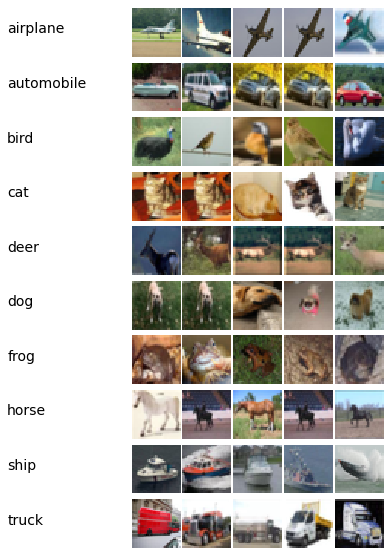

In [ ]:
from __future__ import print_function
channel_means = (0.49139968, 0.48215841, 0.44653091)
channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*channel_stdevs[i])+channel_means[i]
  
  return np.transpose(img, (1,2,0))
  #return np.transpose(img, (1, 2, 0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.04, wspace=0.04)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [ ]:
def train_eval_model(model, train_loader, optimizer, device, epochs=1, test=False, test_loader=None, scheduler=None):
          
    model.train() # set the train mode
    
    # iterate over for `epochs` epochs and keep storing valuable info

    for epoch in range(epochs):
      correct = processed = train_loss = 0
    #   if scheduler:
    #     scheduler.step()

      print(f"\n epoch num ================================= {epoch+1}")
      
      pbar = tqdm(train_loader)
      
      for batch_idx, (data, target) in enumerate(pbar):
          data, target = data.to(device), target.to(device) # move data to `device`

          optimizer.zero_grad() # zero out the gradients to avoid accumulating them over loops

          output = model(data) # get the model's predictions

          loss = F.nll_loss(output, target) # calculate Negative Log Likelihood loss using ground truth labels and the model's predictions

          train_loss += loss.item() # add up the train loss

          loss.backward() # boom ! The magic function to perform backpropagation and calculate the gradients

          optimizer.step() # take 1 step for the optimizer and update the weights

          pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

          correct += pred.eq(target.view_as(pred)).sum().item() #  compare and see how many predictions are coorect and then add up the count

          processed += len(data) # total processed data size

      acc = 100 * correct/processed

      train_losses.append(train_loss)

      train_accuracy.append(acc)

      if scheduler:
        print("\n\n\t\t\tLast LR -->", scheduler.get_last_lr())
        scheduler.step()

      pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')
      
      
      train_loss /= len(train_loader.dataset)
      print('\n\t\t\tTrain metrics: accuracy: {}/{} ({:.4f}%)'.format(correct,
                                                              len(train_loader.dataset),
                                                              correct * 100 / len(train_loader.dataset)))

      if test: # moving to evaluation
          model.eval() # set the correct mode
          
          correct = test_loss = 0

          with torch.no_grad(): # to disable gradient calculation with no_grad context
              
              for data, target in test_loader:

                  data, target = data.to(device), target.to(device)
                  
                  output = model(data)
                  
                  test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
                  
                  pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
                  
                  correct += pred.eq(target.view_as(pred)).sum().item()

          test_loss /= len(test_loader.dataset)
          test_losses.append(test_loss)
          test_accuracy.append(100. * correct / len(test_loader.dataset))

          print('\n\tTest metrics: average loss: {:.4f}, accuracy: {}/{} ({:.5f}%)\n'.format(
              test_loss, correct, len(test_loader.dataset),
              100. * correct / len(test_loader.dataset)))

In [ ]:
def plot_graphs(*, train_losses, train_accuracy, test_losses, test_accuracy):
    fig, axs = plt.subplots(2,2,figsize=(20,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_accuracy)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_accuracy)
    axs[1, 1].set_title("Test Accuracy")

In [ ]:
class Cifar10SearchDataset(torchvision.datasets.CIFAR10):
    def __init__(self, root="./data/cifar10", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

# Define a Convolution Neural Network




# Model 1

In [ ]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            Conv2d(3, 64, 3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1, stride=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, padding=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
            # nn.MaxPool2d(2)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )

        self.block4 = nn.Sequential(
            nn.Conv2d(512, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(10, 10, 1)
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


In [ ]:
model = Net1().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 16, 16]          73,856
       BatchNorm2d-8          [-1, 128, 16, 16]             256
              ReLU-9          [-1, 128, 16, 16]               0
           Conv2d-10          [-1, 256, 16, 16]         295,168
      BatchNorm2d-11          [-1, 256, 16, 16]             512
             ReLU-12          [-1, 256, 16, 16]               0
           Conv2d-13          [-1, 512, 16, 16]       1,180,160
      BatchNorm2d-14          [-1, 512,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #0.0031


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=20, test=True, test_loader=test_loader,scheduler=None)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:14<00:00, 55.17it/s]


			Train metrics: accuracy: 16810/50000 (33.6200%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.5632, accuracy: 4239/10000 (42.39000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:13<00:00, 56.38it/s]


			Train metrics: accuracy: 22428/50000 (44.8560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.3548, accuracy: 5014/10000 (50.14000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:14<00:00, 54.88it/s]


			Train metrics: accuracy: 26316/50000 (52.6320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2079, accuracy: 5564/10000 (55.64000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:13<00:00, 56.49it/s]


			Train metrics: accuracy: 28579/50000 (57.1580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1147, accuracy: 5999/10000 (59.99000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:14<00:00, 54.63it/s]


			Train metrics: accuracy: 30905/50000 (61.8100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0774, accuracy: 6174/10000 (61.74000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:14<00:00, 55.52it/s]


			Train metrics: accuracy: 32142/50000 (64.2840%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0086, accuracy: 6351/10000 (63.51000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:14<00:00, 55.65it/s]


			Train metrics: accuracy: 33249/50000 (66.4980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0120, accuracy: 6412/10000 (64.12000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:13<00:00, 56.18it/s]


			Train metrics: accuracy: 34271/50000 (68.5420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9023, accuracy: 6759/10000 (67.59000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:14<00:00, 54.98it/s]


			Train metrics: accuracy: 35113/50000 (70.2260%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8514, accuracy: 6987/10000 (69.87000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:14<00:00, 55.50it/s]


			Train metrics: accuracy: 35917/50000 (71.8340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9021, accuracy: 6764/10000 (67.64000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:13<00:00, 56.00it/s]


			Train metrics: accuracy: 36550/50000 (73.1000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8045, accuracy: 7163/10000 (71.63000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:13<00:00, 56.39it/s]


			Train metrics: accuracy: 37218/50000 (74.4360%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7556, accuracy: 7346/10000 (73.46000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:14<00:00, 55.38it/s]


			Train metrics: accuracy: 37905/50000 (75.8100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7920, accuracy: 7232/10000 (72.32000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:13<00:00, 55.88it/s]


			Train metrics: accuracy: 38457/50000 (76.9140%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7043, accuracy: 7515/10000 (75.15000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:14<00:00, 55.64it/s]


			Train metrics: accuracy: 38875/50000 (77.7500%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6988, accuracy: 7593/10000 (75.93000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:14<00:00, 55.83it/s]


			Train metrics: accuracy: 39654/50000 (79.3080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6827, accuracy: 7676/10000 (76.76000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:14<00:00, 54.96it/s]


			Train metrics: accuracy: 40279/50000 (80.5580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6765, accuracy: 7645/10000 (76.45000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:14<00:00, 55.28it/s]


			Train metrics: accuracy: 40732/50000 (81.4640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6790, accuracy: 7705/10000 (77.05000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:14<00:00, 55.47it/s]


			Train metrics: accuracy: 41203/50000 (82.4060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6095, accuracy: 7895/10000 (78.95000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:14<00:00, 55.58it/s]


			Train metrics: accuracy: 41627/50000 (83.2540%)



	Test metrics: average loss: 0.5909, accuracy: 7988/10000 (79.88000%)



Text(0.5, 1.0, 'Test Accuracy')

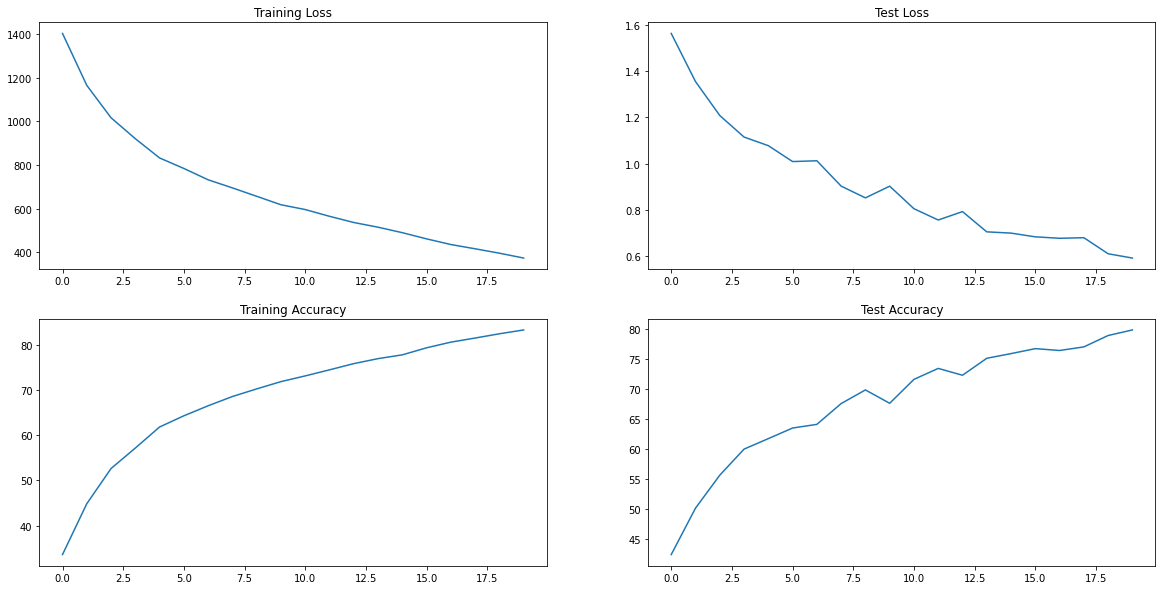

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_accuracy)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accuracy)
axs[1, 1].set_title("Test Accuracy")

# Model 2

In [ ]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 20, 3, padding=1),
            bn(20),
            relu(),
            cv(20, 32, 3, dilation=2, groups=4),
            bn(32),
            relu()
        )

        self.block2 = nn.Sequential(
            cv(32, 64, 3, padding=1, dilation=2, groups=8),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu()
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(32, 128, 3, dilation=2),
            bn(128),
            relu(),
            cv(128, 128, 3, groups=16),
            cv(128, 64, 1),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=2, dilation=2, stride=2),
            bn(64)
        )

        self.block4 = nn.Sequential(
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu(),
            cv(32, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            cv(10, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

model = Net2().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 28, 28]           1,440
       BatchNorm2d-5           [-1, 32, 28, 28]              64
              ReLU-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]           2,304
       BatchNorm2d-8           [-1, 64, 26, 26]             128
              ReLU-9           [-1, 64, 26, 26]               0
           Conv2d-10           [-1, 64, 26, 26]             576
      BatchNorm2d-11           [-1, 64, 26, 26]             128
             ReLU-12           [-1, 64, 26, 26]               0
           Conv2d-13           [-1, 32, 26, 26]           2,048
      BatchNorm2d-14           [-1, 32,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=30, test=True, test_loader=test_loader,scheduler=None)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.06it/s]


			Train metrics: accuracy: 9399/50000 (18.7980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.9014, accuracy: 2760/10000 (27.60000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]


			Train metrics: accuracy: 18011/50000 (36.0220%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.5659, accuracy: 4140/10000 (41.40000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]


			Train metrics: accuracy: 22145/50000 (44.2900%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.4874, accuracy: 4433/10000 (44.33000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.19it/s]


			Train metrics: accuracy: 25436/50000 (50.8720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2591, accuracy: 5451/10000 (54.51000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]


			Train metrics: accuracy: 27886/50000 (55.7720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2005, accuracy: 5672/10000 (56.72000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]


			Train metrics: accuracy: 29477/50000 (58.9540%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1057, accuracy: 6031/10000 (60.31000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]


			Train metrics: accuracy: 30622/50000 (61.2440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0622, accuracy: 6198/10000 (61.98000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]


			Train metrics: accuracy: 31615/50000 (63.2300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0068, accuracy: 6407/10000 (64.07000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]


			Train metrics: accuracy: 32519/50000 (65.0380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0179, accuracy: 6381/10000 (63.81000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]


			Train metrics: accuracy: 33220/50000 (66.4400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0697, accuracy: 6174/10000 (61.74000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]


			Train metrics: accuracy: 33978/50000 (67.9560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9464, accuracy: 6686/10000 (66.86000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]


			Train metrics: accuracy: 34530/50000 (69.0600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9350, accuracy: 6758/10000 (67.58000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]


			Train metrics: accuracy: 35258/50000 (70.5160%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9018, accuracy: 6788/10000 (67.88000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]


			Train metrics: accuracy: 35787/50000 (71.5740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9105, accuracy: 6822/10000 (68.22000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 26.98it/s]


			Train metrics: accuracy: 36146/50000 (72.2920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8498, accuracy: 7028/10000 (70.28000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]


			Train metrics: accuracy: 36835/50000 (73.6700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8920, accuracy: 6892/10000 (68.92000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]


			Train metrics: accuracy: 37103/50000 (74.2060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9172, accuracy: 6782/10000 (67.82000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]


			Train metrics: accuracy: 37689/50000 (75.3780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8465, accuracy: 7045/10000 (70.45000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]


			Train metrics: accuracy: 38114/50000 (76.2280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8433, accuracy: 7081/10000 (70.81000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]


			Train metrics: accuracy: 38604/50000 (77.2080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8410, accuracy: 7170/10000 (71.70000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]


			Train metrics: accuracy: 39039/50000 (78.0780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8714, accuracy: 7036/10000 (70.36000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]


			Train metrics: accuracy: 39334/50000 (78.6680%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8591, accuracy: 7161/10000 (71.61000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:28<00:00, 27.01it/s]


			Train metrics: accuracy: 39688/50000 (79.3760%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8710, accuracy: 7157/10000 (71.57000%)


 epoch num ================================= 24


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]


			Train metrics: accuracy: 40080/50000 (80.1600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9488, accuracy: 6986/10000 (69.86000%)


 epoch num ================================= 25


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]


			Train metrics: accuracy: 40413/50000 (80.8260%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9285, accuracy: 6980/10000 (69.80000%)


 epoch num ================================= 26


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]


			Train metrics: accuracy: 40678/50000 (81.3560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8591, accuracy: 7181/10000 (71.81000%)


 epoch num ================================= 27


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]


			Train metrics: accuracy: 41026/50000 (82.0520%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9061, accuracy: 7169/10000 (71.69000%)


 epoch num ================================= 28


100%|██████████| 782/782 [00:28<00:00, 27.00it/s]


			Train metrics: accuracy: 41319/50000 (82.6380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9234, accuracy: 7015/10000 (70.15000%)


 epoch num ================================= 29


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]


			Train metrics: accuracy: 41530/50000 (83.0600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9079, accuracy: 7118/10000 (71.18000%)


 epoch num ================================= 30


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]


			Train metrics: accuracy: 41791/50000 (83.5820%)



	Test metrics: average loss: 0.9160, accuracy: 7145/10000 (71.45000%)



Text(0.5, 1.0, 'Test Accuracy')

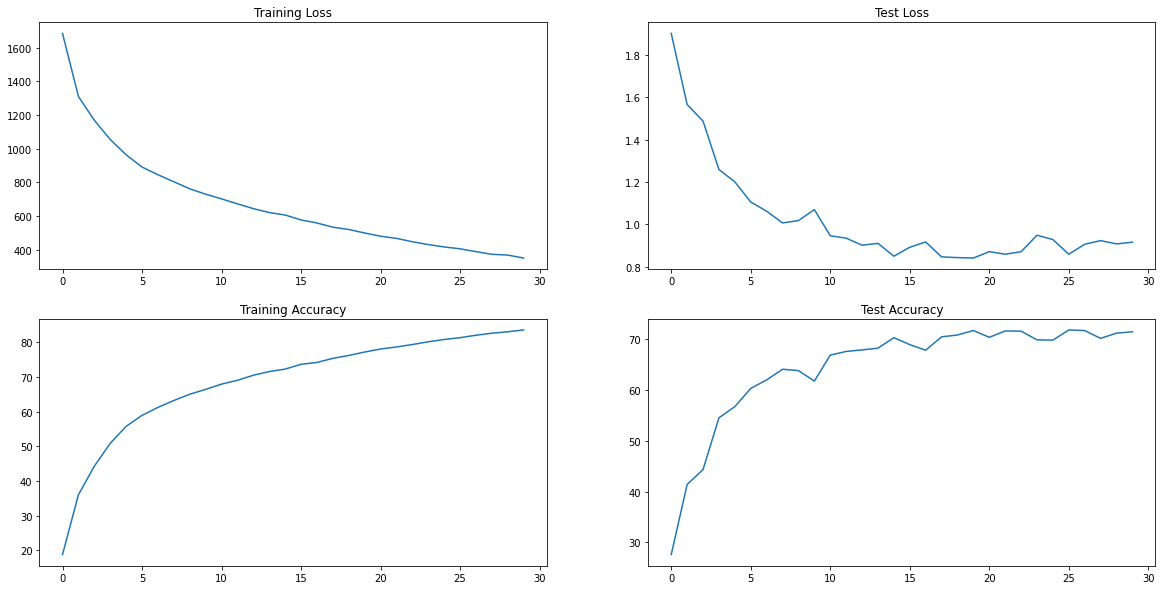

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_accuracy)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_accuracy)
axs[1, 1].set_title("Test Accuracy")

# Code 3 : Adding StepLR to see if pushing train accuracy is possible with decent epochs (same 30)

In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 20, 3, padding=1),
            bn(20),
            relu(),
            cv(20, 32, 3, dilation=2, groups=4),
            bn(32),
            relu()
        )

        self.block2 = nn.Sequential(
            cv(32, 64, 3, padding=1, dilation=2, groups=8),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu()
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(32, 128, 3, dilation=2),
            bn(128),
            relu(),
            cv(128, 128, 3, groups=16),
            cv(128, 64, 1),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=2, dilation=2, stride=2),
            bn(64)
        )

        self.block4 = nn.Sequential(
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu(),
            cv(32, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            cv(10, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = Net3().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 28, 28]           1,440
       BatchNorm2d-5           [-1, 32, 28, 28]              64
              ReLU-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]           2,304
       BatchNorm2d-8           [-1, 64, 26, 26]             128
              ReLU-9           [-1, 64, 26, 26]               0
           Conv2d-10           [-1, 64, 26, 26]             576
      BatchNorm2d-11           [-1, 64, 26, 26]             128
             ReLU-12           [-1, 64, 26, 26]               0
           Conv2d-13           [-1, 32, 26, 26]           2,048
      BatchNorm2d-14           [-1, 32,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0935, momentum=0.9)
scheduler = StepLR(optimizer=optimizer, step_size=1, gamma=0.79)


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=30, test=True, test_loader=test_loader,scheduler=scheduler)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]



			Last LR --> [0.0935]

			Train metrics: accuracy: 21638/50000 (43.2760%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2322, accuracy: 5489/10000 (54.89000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]



			Last LR --> [0.073865]

			Train metrics: accuracy: 25167/50000 (50.3340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2447, accuracy: 5541/10000 (55.41000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.19it/s]



			Last LR --> [0.058353350000000005]

			Train metrics: accuracy: 29578/50000 (59.1560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1473, accuracy: 5874/10000 (58.74000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.04609914650000001]

			Train metrics: accuracy: 32125/50000 (64.2500%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0270, accuracy: 6284/10000 (62.84000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.03641832573500001]

			Train metrics: accuracy: 33855/50000 (67.7100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0017, accuracy: 6519/10000 (65.19000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.028770477330650007]

			Train metrics: accuracy: 35217/50000 (70.4340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8807, accuracy: 6849/10000 (68.49000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.022728677091213505]

			Train metrics: accuracy: 36618/50000 (73.2360%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8549, accuracy: 7000/10000 (70.00000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [0.01795565490205867]

			Train metrics: accuracy: 37520/50000 (75.0400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8162, accuracy: 7114/10000 (71.14000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.03it/s]



			Last LR --> [0.01418496737262635]

			Train metrics: accuracy: 38573/50000 (77.1460%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7839, accuracy: 7244/10000 (72.44000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.011206124224374817]

			Train metrics: accuracy: 39303/50000 (78.6060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7782, accuracy: 7280/10000 (72.80000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]



			Last LR --> [0.008852838137256106]

			Train metrics: accuracy: 40178/50000 (80.3560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7559, accuracy: 7399/10000 (73.99000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]



			Last LR --> [0.006993742128432324]

			Train metrics: accuracy: 41029/50000 (82.0580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7720, accuracy: 7433/10000 (74.33000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]



			Last LR --> [0.005525056281461536]

			Train metrics: accuracy: 41665/50000 (83.3300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7761, accuracy: 7431/10000 (74.31000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.01it/s]



			Last LR --> [0.004364794462354614]

			Train metrics: accuracy: 42321/50000 (84.6420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8065, accuracy: 7395/10000 (73.95000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.003448187625260145]

			Train metrics: accuracy: 42933/50000 (85.8660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8356, accuracy: 7401/10000 (74.01000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]



			Last LR --> [0.002724068223955515]

			Train metrics: accuracy: 43466/50000 (86.9320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8427, accuracy: 7386/10000 (73.86000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.002152013896924857]

			Train metrics: accuracy: 43971/50000 (87.9420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8812, accuracy: 7363/10000 (73.63000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.00it/s]



			Last LR --> [0.0017000909785706369]

			Train metrics: accuracy: 44417/50000 (88.8340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9072, accuracy: 7355/10000 (73.55000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.06it/s]



			Last LR --> [0.001343071873070803]

			Train metrics: accuracy: 44822/50000 (89.6440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9233, accuracy: 7365/10000 (73.65000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.00it/s]



			Last LR --> [0.0010610267797259345]

			Train metrics: accuracy: 45087/50000 (90.1740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9488, accuracy: 7405/10000 (74.05000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.0008382111559834883]

			Train metrics: accuracy: 45447/50000 (90.8940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9673, accuracy: 7365/10000 (73.65000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.0006621868132269558]

			Train metrics: accuracy: 45650/50000 (91.3000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9892, accuracy: 7356/10000 (73.56000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.000523127582449295]

			Train metrics: accuracy: 45880/50000 (91.7600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0063, accuracy: 7360/10000 (73.60000%)


 epoch num ================================= 24


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [0.0004132707901349431]

			Train metrics: accuracy: 46033/50000 (92.0660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0286, accuracy: 7344/10000 (73.44000%)


 epoch num ================================= 25


100%|██████████| 782/782 [00:28<00:00, 27.05it/s]



			Last LR --> [0.00032648392420660504]

			Train metrics: accuracy: 46122/50000 (92.2440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0388, accuracy: 7318/10000 (73.18000%)


 epoch num ================================= 26


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.000257922300123218]

			Train metrics: accuracy: 46266/50000 (92.5320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0479, accuracy: 7341/10000 (73.41000%)


 epoch num ================================= 27


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [0.00020375861709734223]

			Train metrics: accuracy: 46347/50000 (92.6940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0604, accuracy: 7327/10000 (73.27000%)


 epoch num ================================= 28


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.00016096930750690038]

			Train metrics: accuracy: 46411/50000 (92.8220%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0648, accuracy: 7325/10000 (73.25000%)


 epoch num ================================= 29


100%|██████████| 782/782 [00:28<00:00, 27.04it/s]



			Last LR --> [0.0001271657529304513]

			Train metrics: accuracy: 46450/50000 (92.9000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0679, accuracy: 7324/10000 (73.24000%)


 epoch num ================================= 30


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.00010046094481505652]

			Train metrics: accuracy: 46509/50000 (93.0180%)



	Test metrics: average loss: 1.0747, accuracy: 7322/10000 (73.22000%)



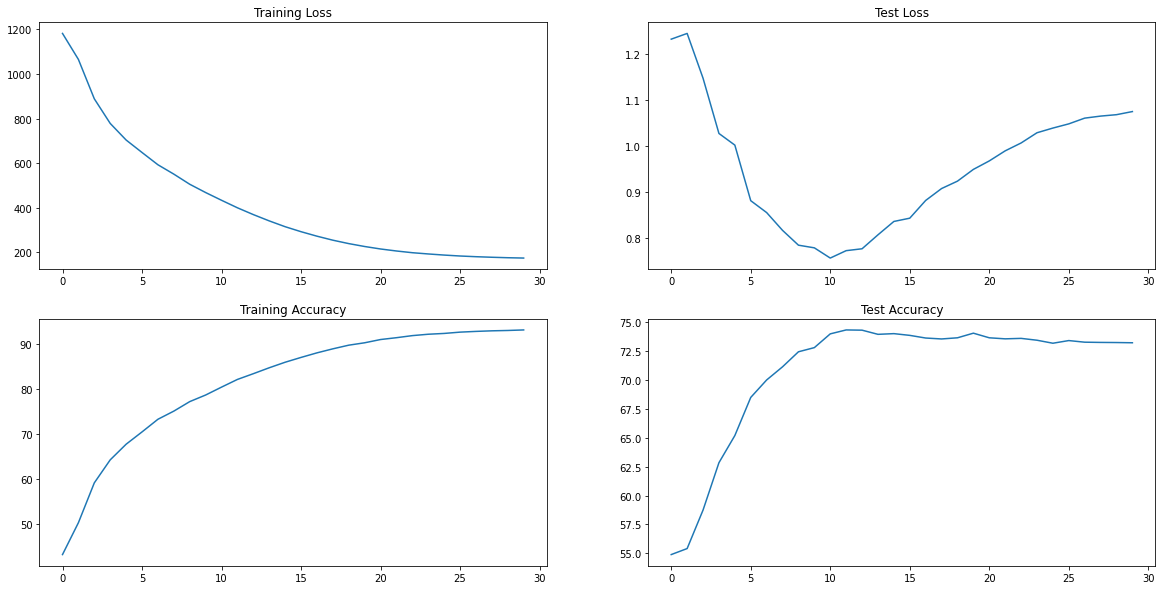

In [ ]:
plot_graphs(train_losses=train_losses, train_accuracy=train_accuracy,
            test_losses=test_losses,test_accuracy=test_accuracy)

## Lot of over-fitting, hence a LOT of potential for the model to improve.

# Note:
### Observing the test loss curve, we can see that loss dropped to a decent value before increasing again (around 10th epoch)

# For next iteration of code, will keep the same architecture as before with addition of augmentation and dropout

In [ ]:
# transforms
train_transforms = A.Compose([
                                A.HorizontalFlip(p=0.20),
                                A.ShiftScaleRotate(shift_limit=0.08,scale_limit=0.1,rotate_limit=25,p=0.25),
                                A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, min_width=16, fill_value=mean),
                                A.MedianBlur(blur_limit=3, p=0.1),
                                A.HueSaturationValue(p=0.1),
                            #   A.GaussianBlur(blur_limit=3, p=0.12),
                                A.RandomBrightnessContrast(brightness_limit=0.09,contrast_limit=0.1, p=0.15),   
                                A.Normalize(mean=mean, std=sdev),
                                ToTensor()
                                       ])

test_transforms = A.Compose([
                            A.Normalize(mean=mean, std=sdev),
                            ToTensor()
                                    ])


In [ ]:

# data sets with transforms
train_set = Cifar10SearchDataset(train=True, download=True, transform=train_transforms)

test_set = Cifar10SearchDataset(train=False, download=True, transform=test_transforms)


# data loaders on data sets
train_loader = torch.utils.data.DataLoader(dataset=train_set, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test_set, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])
torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

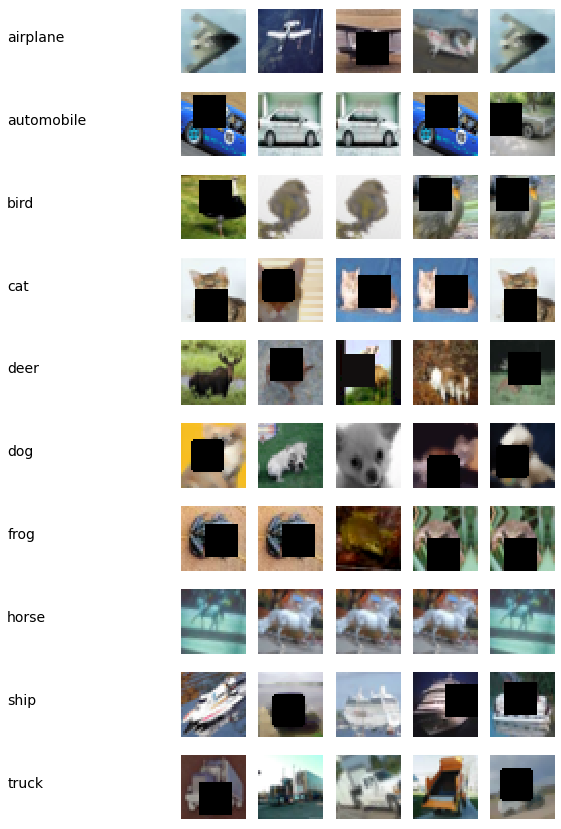

In [ ]:
from __future__ import print_function
# channel_means = (0.49196659, 0.48229005, 0.4461573)
# channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*sdev[i])+mean[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [ ]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 20, 3, padding=1),
            bn(20),
            relu(),
            cv(20, 32, 3, dilation=2, groups=4),
            bn(32),
            relu()
        )

        self.block2 = nn.Sequential(
            cv(32, 64, 3, padding=1, dilation=2, groups=8),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu()
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(32, 128, 3, dilation=2),
            bn(128),
            relu(),
            cv(128, 128, 3, groups=16),
            cv(128, 64, 1),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=2, dilation=2, stride=2),
            bn(64)
        )

        self.block4 = nn.Sequential(
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu(),
            cv(32, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            cv(10, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = Net4().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 28, 28]           1,440
       BatchNorm2d-5           [-1, 32, 28, 28]              64
              ReLU-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]           2,304
       BatchNorm2d-8           [-1, 64, 26, 26]             128
              ReLU-9           [-1, 64, 26, 26]               0
           Conv2d-10           [-1, 64, 26, 26]             576
      BatchNorm2d-11           [-1, 64, 26, 26]             128
             ReLU-12           [-1, 64, 26, 26]               0
           Conv2d-13           [-1, 32, 26, 26]           2,048
      BatchNorm2d-14           [-1, 32,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0935, momentum=0.9)
scheduler = StepLR(optimizer=optimizer, step_size=1, gamma=0.79)


train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=30, test=True, test_loader=test_loader,scheduler=scheduler)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.05it/s]



			Last LR --> [0.0935]

			Train metrics: accuracy: 17272/50000 (34.5440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.4757, accuracy: 4626/10000 (46.26000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.19it/s]



			Last LR --> [0.073865]

			Train metrics: accuracy: 19103/50000 (38.2060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.7265, accuracy: 4381/10000 (43.81000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]



			Last LR --> [0.058353350000000005]

			Train metrics: accuracy: 23244/50000 (46.4880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2565, accuracy: 5500/10000 (55.00000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]



			Last LR --> [0.04609914650000001]

			Train metrics: accuracy: 25351/50000 (50.7020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2725, accuracy: 5619/10000 (56.19000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]



			Last LR --> [0.03641832573500001]

			Train metrics: accuracy: 26827/50000 (53.6540%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2703, accuracy: 5586/10000 (55.86000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]



			Last LR --> [0.028770477330650007]

			Train metrics: accuracy: 28235/50000 (56.4700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1053, accuracy: 6201/10000 (62.01000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]



			Last LR --> [0.022728677091213505]

			Train metrics: accuracy: 29524/50000 (59.0480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9590, accuracy: 6635/10000 (66.35000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.01795565490205867]

			Train metrics: accuracy: 30263/50000 (60.5260%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9695, accuracy: 6616/10000 (66.16000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.06it/s]



			Last LR --> [0.01418496737262635]

			Train metrics: accuracy: 31104/50000 (62.2080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8883, accuracy: 6785/10000 (67.85000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.011206124224374817]

			Train metrics: accuracy: 31664/50000 (63.3280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8537, accuracy: 6949/10000 (69.49000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.008852838137256106]

			Train metrics: accuracy: 32227/50000 (64.4540%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8350, accuracy: 7053/10000 (70.53000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.24it/s]



			Last LR --> [0.006993742128432324]

			Train metrics: accuracy: 32847/50000 (65.6940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8289, accuracy: 7060/10000 (70.60000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.05it/s]



			Last LR --> [0.005525056281461536]

			Train metrics: accuracy: 33110/50000 (66.2200%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8039, accuracy: 7184/10000 (71.84000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [0.004364794462354614]

			Train metrics: accuracy: 33546/50000 (67.0920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7950, accuracy: 7238/10000 (72.38000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]



			Last LR --> [0.003448187625260145]

			Train metrics: accuracy: 33715/50000 (67.4300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7726, accuracy: 7277/10000 (72.77000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.002724068223955515]

			Train metrics: accuracy: 34041/50000 (68.0820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7559, accuracy: 7347/10000 (73.47000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.32it/s]



			Last LR --> [0.002152013896924857]

			Train metrics: accuracy: 34236/50000 (68.4720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7574, accuracy: 7343/10000 (73.43000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.0017000909785706369]

			Train metrics: accuracy: 34380/50000 (68.7600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7477, accuracy: 7377/10000 (73.77000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.001343071873070803]

			Train metrics: accuracy: 34594/50000 (69.1880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7458, accuracy: 7411/10000 (74.11000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.0010610267797259345]

			Train metrics: accuracy: 34585/50000 (69.1700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7400, accuracy: 7412/10000 (74.12000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [0.0008382111559834883]

			Train metrics: accuracy: 34699/50000 (69.3980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7327, accuracy: 7445/10000 (74.45000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:28<00:00, 27.33it/s]



			Last LR --> [0.0006621868132269558]

			Train metrics: accuracy: 34799/50000 (69.5980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7317, accuracy: 7446/10000 (74.46000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.000523127582449295]

			Train metrics: accuracy: 34896/50000 (69.7920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7357, accuracy: 7446/10000 (74.46000%)


 epoch num ================================= 24


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]



			Last LR --> [0.0004132707901349431]

			Train metrics: accuracy: 34664/50000 (69.3280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7292, accuracy: 7458/10000 (74.58000%)


 epoch num ================================= 25


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.00032648392420660504]

			Train metrics: accuracy: 34781/50000 (69.5620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7281, accuracy: 7462/10000 (74.62000%)


 epoch num ================================= 26


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.000257922300123218]

			Train metrics: accuracy: 34901/50000 (69.8020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7259, accuracy: 7475/10000 (74.75000%)


 epoch num ================================= 27


100%|██████████| 782/782 [00:28<00:00, 27.24it/s]



			Last LR --> [0.00020375861709734223]

			Train metrics: accuracy: 35106/50000 (70.2120%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7267, accuracy: 7482/10000 (74.82000%)


 epoch num ================================= 28


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.00016096930750690038]

			Train metrics: accuracy: 35055/50000 (70.1100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7270, accuracy: 7476/10000 (74.76000%)


 epoch num ================================= 29


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [0.0001271657529304513]

			Train metrics: accuracy: 35034/50000 (70.0680%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7267, accuracy: 7474/10000 (74.74000%)


 epoch num ================================= 30


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [0.00010046094481505652]

			Train metrics: accuracy: 34986/50000 (69.9720%)



	Test metrics: average loss: 0.7285, accuracy: 7485/10000 (74.85000%)



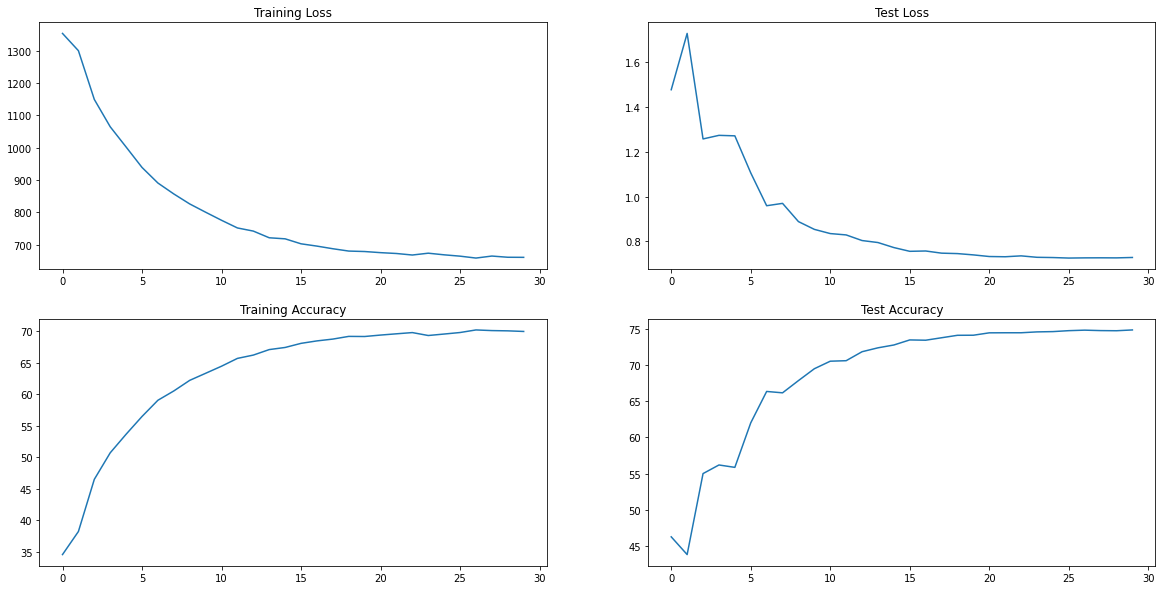

In [ ]:
plot_graphs(train_losses=train_losses, train_accuracy=train_accuracy,
            test_losses=test_losses,test_accuracy=test_accuracy)

# Hmmm... 🤔... Not great results in terms of max accuracy for train data but the gap between train and test accuracies has surely decresed with train accuracy coming down significantly.. Have I screwed up the data too much with Augmentations ?? Surely reducing LR more quickly would help as model was also learning a bit towards the end runs.

# Code 5

In [ ]:
# transforms

# here changed CoarseDropout's p to 0.25 from default 0.5, along with minor change in MedianBlur value and HSV' value
train_transforms = A.Compose([
                                A.HorizontalFlip(p=0.20),
                                A.ShiftScaleRotate(shift_limit=0.08,scale_limit=0.1,rotate_limit=25,p=0.25),
                                A.CoarseDropout(max_holes=1, p=0.25, max_height=16,
                                                max_width=16, min_holes=1, min_height=16,
                                                min_width=16, fill_value=mean),
                                A.MedianBlur(blur_limit=3, p=0.09),
                                A.HueSaturationValue(p=0.1),
                            #   A.GaussianBlur(blur_limit=3, p=0.12),
                                # A.RandomBrightnessContrast(brightness_limit=0.09,contrast_limit=0.1, p=0.15),   
                                A.Normalize(mean=mean, std=sdev),
                                ToTensor()
                                       ])

test_transforms = A.Compose([
                            A.Normalize(mean=mean, std=sdev),
                            ToTensor()
                                    ])


In [ ]:

# data sets with transforms
train_set = Cifar10SearchDataset(train=True, download=True, transform=train_transforms)

test_set = Cifar10SearchDataset(train=False, download=True, transform=test_transforms)


# data loaders on data sets
train_loader = torch.utils.data.DataLoader(dataset=train_set, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test_set, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])
torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


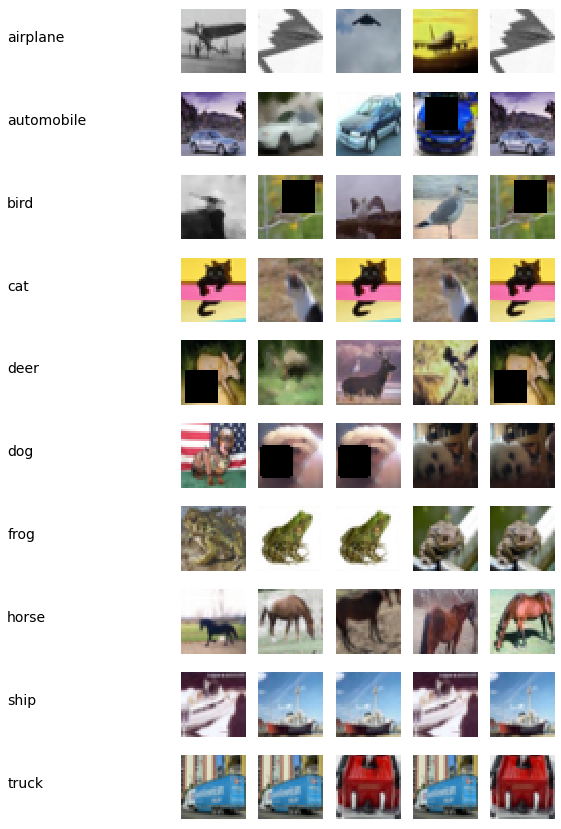

In [ ]:
from __future__ import print_function
# channel_means = (0.49196659, 0.48229005, 0.4461573)
# channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*sdev[i])+mean[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [ ]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 20, 3, padding=1),
            bn(20),
            relu(),
            cv(20, 32, 3, dilation=2, groups=4),
            bn(32),
            relu()
        )

        self.block2 = nn.Sequential(
            cv(32, 64, 3, padding=1, dilation=2, groups=8),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu()
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(32, 128, 3, dilation=2),
            bn(128),
            relu(),
            cv(128, 128, 3, groups=16),
            cv(128, 64, 1),
            bn(64),
            relu(),
            cv(64, 64, 3, padding=2, dilation=2, stride=2),
            bn(64)
        )

        self.block4 = nn.Sequential(
            cv(64, 64, 3, padding=1, groups=64),
            bn(64),
            relu(),
            cv(64, 32, 1),
            bn(32),
            relu(),
            cv(32, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            # cv(10, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = Net4().to(device)
from summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 32, 32]             540
       BatchNorm2d-2           [-1, 20, 32, 32]              40
              ReLU-3           [-1, 20, 32, 32]               0
            Conv2d-4           [-1, 32, 28, 28]           1,440
       BatchNorm2d-5           [-1, 32, 28, 28]              64
              ReLU-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]           2,304
       BatchNorm2d-8           [-1, 64, 26, 26]             128
              ReLU-9           [-1, 64, 26, 26]               0
           Conv2d-10           [-1, 64, 26, 26]             576
      BatchNorm2d-11           [-1, 64, 26, 26]             128
             ReLU-12           [-1, 64, 26, 26]               0
           Conv2d-13           [-1, 32, 26, 26]           2,048
      BatchNorm2d-14           [-1, 32,

In [ ]:
from torch.optim import lr_scheduler 

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0799, momentum=0.9)
step_lr = StepLR(optimizer=optimizer, step_size=2, gamma=0.67)
# cosanl = lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=5,T_mult=2,eta_min=0.0009, verbose=True)

train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=50, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch     0: adjusting learning rate of group 0 to 7.9900e-02.

 epoch num ================================= 1


100%|██████████| 782/782 [00:29<00:00, 26.94it/s]



			Last LR --> [0.0799]

			Train metrics: accuracy: 20691/50000 (41.3820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.3723, accuracy: 5131/10000 (51.31000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]



			Last LR --> [0.0799]

			Train metrics: accuracy: 15923/50000 (31.8460%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.4433, accuracy: 4666/10000 (46.66000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.28it/s]



			Last LR --> [0.053533000000000004]

			Train metrics: accuracy: 23760/50000 (47.5200%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.3109, accuracy: 5113/10000 (51.13000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.24it/s]



			Last LR --> [0.053533000000000004]

			Train metrics: accuracy: 25945/50000 (51.8900%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1827, accuracy: 5575/10000 (55.75000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.32it/s]



			Last LR --> [0.03586711000000001]

			Train metrics: accuracy: 28219/50000 (56.4380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0073, accuracy: 6384/10000 (63.84000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.03586711000000001]

			Train metrics: accuracy: 29094/50000 (58.1880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1190, accuracy: 6045/10000 (60.45000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.34it/s]



			Last LR --> [0.024030963700000005]

			Train metrics: accuracy: 30419/50000 (60.8380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9322, accuracy: 6670/10000 (66.70000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.33it/s]



			Last LR --> [0.024030963700000005]

			Train metrics: accuracy: 30956/50000 (61.9120%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9600, accuracy: 6560/10000 (65.60000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.38it/s]



			Last LR --> [0.016100745679000005]

			Train metrics: accuracy: 32274/50000 (64.5480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8938, accuracy: 6821/10000 (68.21000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.016100745679000005]

			Train metrics: accuracy: 32542/50000 (65.0840%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8463, accuracy: 6990/10000 (69.90000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.36it/s]



			Last LR --> [0.010787499604930004]

			Train metrics: accuracy: 33479/50000 (66.9580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7953, accuracy: 7207/10000 (72.07000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.27it/s]



			Last LR --> [0.010787499604930004]

			Train metrics: accuracy: 33812/50000 (67.6240%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8003, accuracy: 7174/10000 (71.74000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.007227624735303103]

			Train metrics: accuracy: 34297/50000 (68.5940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7907, accuracy: 7229/10000 (72.29000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.32it/s]



			Last LR --> [0.007227624735303103]

			Train metrics: accuracy: 34533/50000 (69.0660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7639, accuracy: 7310/10000 (73.10000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.29it/s]



			Last LR --> [0.004842508572653079]

			Train metrics: accuracy: 34923/50000 (69.8460%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7474, accuracy: 7357/10000 (73.57000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.30it/s]



			Last LR --> [0.004842508572653079]

			Train metrics: accuracy: 35109/50000 (70.2180%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7431, accuracy: 7425/10000 (74.25000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.34it/s]



			Last LR --> [0.003244480743677563]

			Train metrics: accuracy: 35552/50000 (71.1040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7333, accuracy: 7456/10000 (74.56000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.33it/s]



			Last LR --> [0.003244480743677563]

			Train metrics: accuracy: 35697/50000 (71.3940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7138, accuracy: 7508/10000 (75.08000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.28it/s]



			Last LR --> [0.0021738020982639676]

			Train metrics: accuracy: 35845/50000 (71.6900%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7185, accuracy: 7520/10000 (75.20000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.0021738020982639676]

			Train metrics: accuracy: 35915/50000 (71.8300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7125, accuracy: 7514/10000 (75.14000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:28<00:00, 27.38it/s]



			Last LR --> [0.0014564474058368583]

			Train metrics: accuracy: 36268/50000 (72.5360%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7073, accuracy: 7543/10000 (75.43000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:28<00:00, 27.32it/s]



			Last LR --> [0.0014564474058368583]

			Train metrics: accuracy: 36115/50000 (72.2300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7085, accuracy: 7529/10000 (75.29000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:28<00:00, 27.31it/s]



			Last LR --> [0.0009758197619106951]

			Train metrics: accuracy: 36399/50000 (72.7980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7113, accuracy: 7560/10000 (75.60000%)


 epoch num ================================= 24


100%|██████████| 782/782 [00:28<00:00, 27.27it/s]



			Last LR --> [0.0009758197619106951]

			Train metrics: accuracy: 36401/50000 (72.8020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6982, accuracy: 7571/10000 (75.71000%)


 epoch num ================================= 25


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.0006537992404801658]

			Train metrics: accuracy: 36536/50000 (73.0720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7015, accuracy: 7564/10000 (75.64000%)


 epoch num ================================= 26


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [0.0006537992404801658]

			Train metrics: accuracy: 36612/50000 (73.2240%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7000, accuracy: 7555/10000 (75.55000%)


 epoch num ================================= 27


100%|██████████| 782/782 [00:28<00:00, 27.27it/s]



			Last LR --> [0.0004380454911217111]

			Train metrics: accuracy: 36592/50000 (73.1840%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6949, accuracy: 7575/10000 (75.75000%)


 epoch num ================================= 28


100%|██████████| 782/782 [00:28<00:00, 27.22it/s]



			Last LR --> [0.0004380454911217111]

			Train metrics: accuracy: 36632/50000 (73.2640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6966, accuracy: 7582/10000 (75.82000%)


 epoch num ================================= 29


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.00029349047905154646]

			Train metrics: accuracy: 36714/50000 (73.4280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6981, accuracy: 7576/10000 (75.76000%)


 epoch num ================================= 30


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.00029349047905154646]

			Train metrics: accuracy: 36706/50000 (73.4120%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6944, accuracy: 7594/10000 (75.94000%)


 epoch num ================================= 31


100%|██████████| 782/782 [00:28<00:00, 27.34it/s]



			Last LR --> [0.00019663862096453615]

			Train metrics: accuracy: 36679/50000 (73.3580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6973, accuracy: 7594/10000 (75.94000%)


 epoch num ================================= 32


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [0.00019663862096453615]

			Train metrics: accuracy: 36663/50000 (73.3260%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6946, accuracy: 7610/10000 (76.10000%)


 epoch num ================================= 33


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.00013174787604623922]

			Train metrics: accuracy: 36814/50000 (73.6280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6955, accuracy: 7591/10000 (75.91000%)


 epoch num ================================= 34


100%|██████████| 782/782 [00:28<00:00, 27.31it/s]



			Last LR --> [0.00013174787604623922]

			Train metrics: accuracy: 36864/50000 (73.7280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6922, accuracy: 7601/10000 (76.01000%)


 epoch num ================================= 35


100%|██████████| 782/782 [00:28<00:00, 27.31it/s]



			Last LR --> [8.827107695098029e-05]

			Train metrics: accuracy: 36889/50000 (73.7780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6921, accuracy: 7588/10000 (75.88000%)


 epoch num ================================= 36


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [8.827107695098029e-05]

			Train metrics: accuracy: 36906/50000 (73.8120%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6952, accuracy: 7597/10000 (75.97000%)


 epoch num ================================= 37


100%|██████████| 782/782 [00:28<00:00, 27.30it/s]



			Last LR --> [5.91416215571568e-05]

			Train metrics: accuracy: 36704/50000 (73.4080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6931, accuracy: 7596/10000 (75.96000%)


 epoch num ================================= 38


100%|██████████| 782/782 [00:28<00:00, 27.33it/s]



			Last LR --> [5.91416215571568e-05]

			Train metrics: accuracy: 36716/50000 (73.4320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6933, accuracy: 7603/10000 (76.03000%)


 epoch num ================================= 39


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [3.9624886443295055e-05]

			Train metrics: accuracy: 36715/50000 (73.4300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6934, accuracy: 7601/10000 (76.01000%)


 epoch num ================================= 40


100%|██████████| 782/782 [00:28<00:00, 27.22it/s]



			Last LR --> [3.9624886443295055e-05]

			Train metrics: accuracy: 36797/50000 (73.5940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6924, accuracy: 7600/10000 (76.00000%)


 epoch num ================================= 41


100%|██████████| 782/782 [00:28<00:00, 27.19it/s]



			Last LR --> [2.654867391700769e-05]

			Train metrics: accuracy: 36751/50000 (73.5020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6925, accuracy: 7606/10000 (76.06000%)


 epoch num ================================= 42


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [2.654867391700769e-05]

			Train metrics: accuracy: 36778/50000 (73.5560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6917, accuracy: 7605/10000 (76.05000%)


 epoch num ================================= 43


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [1.7787611524395152e-05]

			Train metrics: accuracy: 36875/50000 (73.7500%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6920, accuracy: 7604/10000 (76.04000%)


 epoch num ================================= 44


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [1.7787611524395152e-05]

			Train metrics: accuracy: 36854/50000 (73.7080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6922, accuracy: 7604/10000 (76.04000%)


 epoch num ================================= 45


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [1.1917699721344752e-05]

			Train metrics: accuracy: 36703/50000 (73.4060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6920, accuracy: 7605/10000 (76.05000%)


 epoch num ================================= 46


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [1.1917699721344752e-05]

			Train metrics: accuracy: 36854/50000 (73.7080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6919, accuracy: 7609/10000 (76.09000%)


 epoch num ================================= 47


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [7.984858813300984e-06]

			Train metrics: accuracy: 36811/50000 (73.6220%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6920, accuracy: 7607/10000 (76.07000%)


 epoch num ================================= 48


100%|██████████| 782/782 [00:28<00:00, 27.06it/s]



			Last LR --> [7.984858813300984e-06]

			Train metrics: accuracy: 36787/50000 (73.5740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6925, accuracy: 7608/10000 (76.08000%)


 epoch num ================================= 49


100%|██████████| 782/782 [00:28<00:00, 27.19it/s]



			Last LR --> [5.34985540491166e-06]

			Train metrics: accuracy: 36748/50000 (73.4960%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6922, accuracy: 7608/10000 (76.08000%)


 epoch num ================================= 50


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [5.34985540491166e-06]

			Train metrics: accuracy: 36905/50000 (73.8100%)



	Test metrics: average loss: 0.6921, accuracy: 7608/10000 (76.08000%)



# Training for another 20 epochs the same model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0399, momentum=0.9) # LR changed
step_lr = StepLR(optimizer=optimizer, step_size=1, gamma=0.67)


train_eval_model(model, train_loader, optimizer, device, epochs=20, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.0399]

			Train metrics: accuracy: 32252/50000 (64.5040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7759, accuracy: 7271/10000 (72.71000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.026733]

			Train metrics: accuracy: 33297/50000 (66.5940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8302, accuracy: 7085/10000 (70.85000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.33it/s]



			Last LR --> [0.01791111]

			Train metrics: accuracy: 34527/50000 (69.0540%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7843, accuracy: 7303/10000 (73.03000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.012000443700000002]

			Train metrics: accuracy: 35699/50000 (71.3980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7868, accuracy: 7397/10000 (73.97000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [0.008040297279000002]

			Train metrics: accuracy: 36328/50000 (72.6560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6640, accuracy: 7729/10000 (77.29000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.24it/s]



			Last LR --> [0.005386999176930002]

			Train metrics: accuracy: 36793/50000 (73.5860%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6667, accuracy: 7714/10000 (77.14000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [0.0036092894485431014]

			Train metrics: accuracy: 37191/50000 (74.3820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6592, accuracy: 7759/10000 (77.59000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.18it/s]



			Last LR --> [0.002418223930523878]

			Train metrics: accuracy: 37434/50000 (74.8680%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6524, accuracy: 7776/10000 (77.76000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.28it/s]



			Last LR --> [0.0016202100334509984]

			Train metrics: accuracy: 37687/50000 (75.3740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6424, accuracy: 7837/10000 (78.37000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]



			Last LR --> [0.001085540722412169]

			Train metrics: accuracy: 37716/50000 (75.4320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6358, accuracy: 7863/10000 (78.63000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.03it/s]



			Last LR --> [0.0007273122840161533]

			Train metrics: accuracy: 37844/50000 (75.6880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6308, accuracy: 7867/10000 (78.67000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.0004872992302908227]

			Train metrics: accuracy: 37920/50000 (75.8400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6329, accuracy: 7860/10000 (78.60000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.00032649048429485126]

			Train metrics: accuracy: 37936/50000 (75.8720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6382, accuracy: 7852/10000 (78.52000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.15it/s]



			Last LR --> [0.00021874862447755037]

			Train metrics: accuracy: 37970/50000 (75.9400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6316, accuracy: 7859/10000 (78.59000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.00014656157839995876]

			Train metrics: accuracy: 38114/50000 (76.2280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6317, accuracy: 7863/10000 (78.63000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [9.819625752797237e-05]

			Train metrics: accuracy: 38037/50000 (76.0740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6308, accuracy: 7867/10000 (78.67000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]



			Last LR --> [6.579149254374149e-05]

			Train metrics: accuracy: 38037/50000 (76.0740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6297, accuracy: 7881/10000 (78.81000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [4.40803000043068e-05]

			Train metrics: accuracy: 38078/50000 (76.1560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6312, accuracy: 7873/10000 (78.73000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.24it/s]



			Last LR --> [2.9533801002885558e-05]

			Train metrics: accuracy: 37989/50000 (75.9780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6315, accuracy: 7868/10000 (78.68000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [1.9787646671933323e-05]

			Train metrics: accuracy: 37999/50000 (75.9980%)



	Test metrics: average loss: 0.6300, accuracy: 7872/10000 (78.72000%)



# Training the same model for 10 more epochs WITHOUT StepLR and contant LR of 0.003 with nesterov=True

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9, nesterov=True) # LR changed

train_eval_model(model, train_loader, optimizer, device, epochs=10, test=True, test_loader=test_loader,scheduler=None)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]


			Train metrics: accuracy: 35941/50000 (71.8820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6530, accuracy: 7766/10000 (77.66000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]


			Train metrics: accuracy: 37065/50000 (74.1300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6435, accuracy: 7775/10000 (77.75000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]


			Train metrics: accuracy: 37453/50000 (74.9060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6369, accuracy: 7806/10000 (78.06000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.01it/s]


			Train metrics: accuracy: 37465/50000 (74.9300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6289, accuracy: 7885/10000 (78.85000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]


			Train metrics: accuracy: 37632/50000 (75.2640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6237, accuracy: 7914/10000 (79.14000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]


			Train metrics: accuracy: 37691/50000 (75.3820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6213, accuracy: 7895/10000 (78.95000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]


			Train metrics: accuracy: 37686/50000 (75.3720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6286, accuracy: 7852/10000 (78.52000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]


			Train metrics: accuracy: 37903/50000 (75.8060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6257, accuracy: 7860/10000 (78.60000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.04it/s]


			Train metrics: accuracy: 37921/50000 (75.8420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6382, accuracy: 7822/10000 (78.22000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]


			Train metrics: accuracy: 37936/50000 (75.8720%)



	Test metrics: average loss: 0.6383, accuracy: 7842/10000 (78.42000%)



# Training the same model for 10 more epochs WITHOUT StepLR and contant LR of 0.0007 with nesterov=True

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0007, momentum=0.9, nesterov=True) # LR changed

train_eval_model(model, train_loader, optimizer, device, epochs=10, test=True, test_loader=test_loader,scheduler=None)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:29<00:00, 26.65it/s]


			Train metrics: accuracy: 36805/50000 (73.6100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6348, accuracy: 7857/10000 (78.57000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.05it/s]


			Train metrics: accuracy: 37794/50000 (75.5880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6138, accuracy: 7899/10000 (78.99000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]


			Train metrics: accuracy: 37881/50000 (75.7620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6108, accuracy: 7901/10000 (79.01000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]


			Train metrics: accuracy: 38102/50000 (76.2040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6058, accuracy: 7921/10000 (79.21000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.16it/s]


			Train metrics: accuracy: 38235/50000 (76.4700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6075, accuracy: 7910/10000 (79.10000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]


			Train metrics: accuracy: 38233/50000 (76.4660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6105, accuracy: 7923/10000 (79.23000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.05it/s]


			Train metrics: accuracy: 38342/50000 (76.6840%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5980, accuracy: 7970/10000 (79.70000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:29<00:00, 26.92it/s]


			Train metrics: accuracy: 38419/50000 (76.8380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6053, accuracy: 7952/10000 (79.52000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]


			Train metrics: accuracy: 38221/50000 (76.4420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6065, accuracy: 7957/10000 (79.57000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.00it/s]


			Train metrics: accuracy: 38283/50000 (76.5660%)



	Test metrics: average loss: 0.5973, accuracy: 7990/10000 (79.90000%)



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0099, momentum=0.9)
# step_lr = StepLR(optimizer=optimizer, step_size=2, gamma=0.67)
cosanl = lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=3,T_mult=2,eta_min=0.0009, verbose=True,)

train_eval_model(model, train_loader, optimizer, device, epochs=20, test=True, test_loader=test_loader,scheduler=cosanl)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch     0: adjusting learning rate of group 0 to 9.9000e-03.

 epoch num ================================= 1


100%|██████████| 782/782 [00:28<00:00, 27.06it/s]



			Last LR --> [0.0099]
Epoch     1: adjusting learning rate of group 0 to 7.6500e-03.

			Train metrics: accuracy: 36817/50000 (73.6340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6133, accuracy: 7888/10000 (78.88000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.14it/s]



			Last LR --> [0.0076500000000000005]
Epoch     2: adjusting learning rate of group 0 to 3.1500e-03.

			Train metrics: accuracy: 37041/50000 (74.0820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6371, accuracy: 7840/10000 (78.40000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.07it/s]



			Last LR --> [0.003150000000000001]
Epoch     3: adjusting learning rate of group 0 to 9.9000e-03.

			Train metrics: accuracy: 38035/50000 (76.0700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6085, accuracy: 7963/10000 (79.63000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.0099]
Epoch     4: adjusting learning rate of group 0 to 9.2971e-03.

			Train metrics: accuracy: 37033/50000 (74.0660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7320, accuracy: 7539/10000 (75.39000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]



			Last LR --> [0.009297114317029976]
Epoch     5: adjusting learning rate of group 0 to 7.6500e-03.

			Train metrics: accuracy: 37282/50000 (74.5640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6495, accuracy: 7809/10000 (78.09000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 26.99it/s]



			Last LR --> [0.0076500000000000005]
Epoch     6: adjusting learning rate of group 0 to 5.4000e-03.

			Train metrics: accuracy: 37589/50000 (75.1780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6377, accuracy: 7837/10000 (78.37000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.0054]
Epoch     7: adjusting learning rate of group 0 to 3.1500e-03.

			Train metrics: accuracy: 38172/50000 (76.3440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6046, accuracy: 7955/10000 (79.55000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.26it/s]



			Last LR --> [0.003150000000000001]
Epoch     8: adjusting learning rate of group 0 to 1.5029e-03.

			Train metrics: accuracy: 38592/50000 (77.1840%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6073, accuracy: 7948/10000 (79.48000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 26.97it/s]



			Last LR --> [0.0015028856829700258]
Epoch     9: adjusting learning rate of group 0 to 9.9000e-03.

			Train metrics: accuracy: 38839/50000 (77.6780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6029, accuracy: 8013/10000 (80.13000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.0099]
Epoch    10: adjusting learning rate of group 0 to 9.7467e-03.

			Train metrics: accuracy: 37579/50000 (75.1580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6875, accuracy: 7677/10000 (76.77000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.23it/s]



			Last LR --> [0.009746666218300807]
Epoch    11: adjusting learning rate of group 0 to 9.2971e-03.

			Train metrics: accuracy: 37558/50000 (75.1160%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6444, accuracy: 7833/10000 (78.33000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.10it/s]



			Last LR --> [0.009297114317029976]
Epoch    12: adjusting learning rate of group 0 to 8.5820e-03.

			Train metrics: accuracy: 37882/50000 (75.7640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6314, accuracy: 7847/10000 (78.47000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.008581980515339465]
Epoch    13: adjusting learning rate of group 0 to 7.6500e-03.

			Train metrics: accuracy: 38032/50000 (76.0640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6150, accuracy: 7950/10000 (79.50000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.12it/s]



			Last LR --> [0.0076500000000000005]
Epoch    14: adjusting learning rate of group 0 to 6.5647e-03.

			Train metrics: accuracy: 38336/50000 (76.6720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5922, accuracy: 8018/10000 (80.18000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.04it/s]



			Last LR --> [0.0065646857029613434]
Epoch    15: adjusting learning rate of group 0 to 5.4000e-03.

			Train metrics: accuracy: 38465/50000 (76.9300%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6005, accuracy: 7962/10000 (79.62000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.21it/s]



			Last LR --> [0.0054]
Epoch    16: adjusting learning rate of group 0 to 4.2353e-03.

			Train metrics: accuracy: 38774/50000 (77.5480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5898, accuracy: 8024/10000 (80.24000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 26.99it/s]



			Last LR --> [0.004235314297038657]
Epoch    17: adjusting learning rate of group 0 to 3.1500e-03.

			Train metrics: accuracy: 39147/50000 (78.2940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5882, accuracy: 8066/10000 (80.66000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:29<00:00, 26.91it/s]



			Last LR --> [0.003150000000000001]
Epoch    18: adjusting learning rate of group 0 to 2.2180e-03.

			Train metrics: accuracy: 39313/50000 (78.6260%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6095, accuracy: 7973/10000 (79.73000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.0022180194846605364]
Epoch    19: adjusting learning rate of group 0 to 1.5029e-03.

			Train metrics: accuracy: 39567/50000 (79.1340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5749, accuracy: 8101/10000 (81.01000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.0015028856829700258]
Epoch    20: adjusting learning rate of group 0 to 1.0533e-03.

			Train metrics: accuracy: 39729/50000 (79.4580%)



	Test metrics: average loss: 0.5735, accuracy: 8108/10000 (81.08000%)



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# step_lr = StepLR(optimizer=optimizer, step_size=2, gamma=0.67)
cosanl = lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=5,T_mult=2,eta_min=0.0001, verbose=True,)

train_eval_model(model, train_loader, optimizer, device, epochs=20, test=True, test_loader=test_loader,scheduler=cosanl)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch     0: adjusting learning rate of group 0 to 1.0000e-03.

 epoch num ================================= 1


100%|██████████| 782/782 [00:29<00:00, 26.93it/s]



			Last LR --> [0.001]
Epoch     1: adjusting learning rate of group 0 to 9.1406e-04.

			Train metrics: accuracy: 37931/50000 (75.8620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5784, accuracy: 8057/10000 (80.57000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.0009140576474687263]
Epoch     2: adjusting learning rate of group 0 to 6.8906e-04.

			Train metrics: accuracy: 38956/50000 (77.9120%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5661, accuracy: 8075/10000 (80.75000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.0006890576474687264]
Epoch     3: adjusting learning rate of group 0 to 4.1094e-04.

			Train metrics: accuracy: 39301/50000 (78.6020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5604, accuracy: 8126/10000 (81.26000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:28<00:00, 27.22it/s]



			Last LR --> [0.0004109423525312737]
Epoch     4: adjusting learning rate of group 0 to 1.8594e-04.

			Train metrics: accuracy: 39540/50000 (79.0800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5565, accuracy: 8145/10000 (81.45000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.00018594235253127368]
Epoch     5: adjusting learning rate of group 0 to 1.0000e-03.

			Train metrics: accuracy: 39452/50000 (78.9040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5593, accuracy: 8140/10000 (81.40000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:28<00:00, 27.08it/s]



			Last LR --> [0.001]
Epoch     6: adjusting learning rate of group 0 to 9.7798e-04.

			Train metrics: accuracy: 39503/50000 (79.0060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5599, accuracy: 8148/10000 (81.48000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:28<00:00, 27.09it/s]



			Last LR --> [0.0009779754323328191]
Epoch     7: adjusting learning rate of group 0 to 9.1406e-04.

			Train metrics: accuracy: 39437/50000 (78.8740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5610, accuracy: 8141/10000 (81.41000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.0009140576474687263]
Epoch     8: adjusting learning rate of group 0 to 8.1450e-04.

			Train metrics: accuracy: 39631/50000 (79.2620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5589, accuracy: 8149/10000 (81.49000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:28<00:00, 27.13it/s]



			Last LR --> [0.000814503363531613]
Epoch     9: adjusting learning rate of group 0 to 6.8906e-04.

			Train metrics: accuracy: 39550/50000 (79.1000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5598, accuracy: 8151/10000 (81.51000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:28<00:00, 27.17it/s]



			Last LR --> [0.0006890576474687264]
Epoch    10: adjusting learning rate of group 0 to 5.5000e-04.

			Train metrics: accuracy: 39723/50000 (79.4460%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5575, accuracy: 8148/10000 (81.48000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:28<00:00, 27.28it/s]



			Last LR --> [0.00055]
Epoch    11: adjusting learning rate of group 0 to 4.1094e-04.

			Train metrics: accuracy: 39755/50000 (79.5100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5581, accuracy: 8150/10000 (81.50000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:28<00:00, 27.20it/s]



			Last LR --> [0.0004109423525312737]
Epoch    12: adjusting learning rate of group 0 to 2.8550e-04.

			Train metrics: accuracy: 39919/50000 (79.8380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5551, accuracy: 8124/10000 (81.24000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.00028549663646838715]
Epoch    13: adjusting learning rate of group 0 to 1.8594e-04.

			Train metrics: accuracy: 39857/50000 (79.7140%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5585, accuracy: 8132/10000 (81.32000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:28<00:00, 27.22it/s]



			Last LR --> [0.00018594235253127368]
Epoch    14: adjusting learning rate of group 0 to 1.2202e-04.

			Train metrics: accuracy: 39911/50000 (79.8220%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5549, accuracy: 8156/10000 (81.56000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:28<00:00, 27.29it/s]



			Last LR --> [0.00012202456766718092]
Epoch    15: adjusting learning rate of group 0 to 1.0000e-03.

			Train metrics: accuracy: 40048/50000 (80.0960%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5558, accuracy: 8154/10000 (81.54000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:28<00:00, 27.11it/s]



			Last LR --> [0.001]
Epoch    16: adjusting learning rate of group 0 to 9.9446e-04.

			Train metrics: accuracy: 39808/50000 (79.6160%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5670, accuracy: 8121/10000 (81.21000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:28<00:00, 27.32it/s]



			Last LR --> [0.000994459753267812]
Epoch    17: adjusting learning rate of group 0 to 9.7798e-04.

			Train metrics: accuracy: 39749/50000 (79.4980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5597, accuracy: 8161/10000 (81.61000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:28<00:00, 27.25it/s]



			Last LR --> [0.0009779754323328191]
Epoch    18: adjusting learning rate of group 0 to 9.5095e-04.

			Train metrics: accuracy: 39862/50000 (79.7240%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5637, accuracy: 8148/10000 (81.48000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:28<00:00, 27.31it/s]



			Last LR --> [0.0009509529358847655]
Epoch    19: adjusting learning rate of group 0 to 9.1406e-04.

			Train metrics: accuracy: 39837/50000 (79.6740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5593, accuracy: 8145/10000 (81.45000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:28<00:00, 27.31it/s]



			Last LR --> [0.0009140576474687263]
Epoch    20: adjusting learning rate of group 0 to 8.6820e-04.

			Train metrics: accuracy: 39909/50000 (79.8180%)



	Test metrics: average loss: 0.5567, accuracy: 8147/10000 (81.47000%)



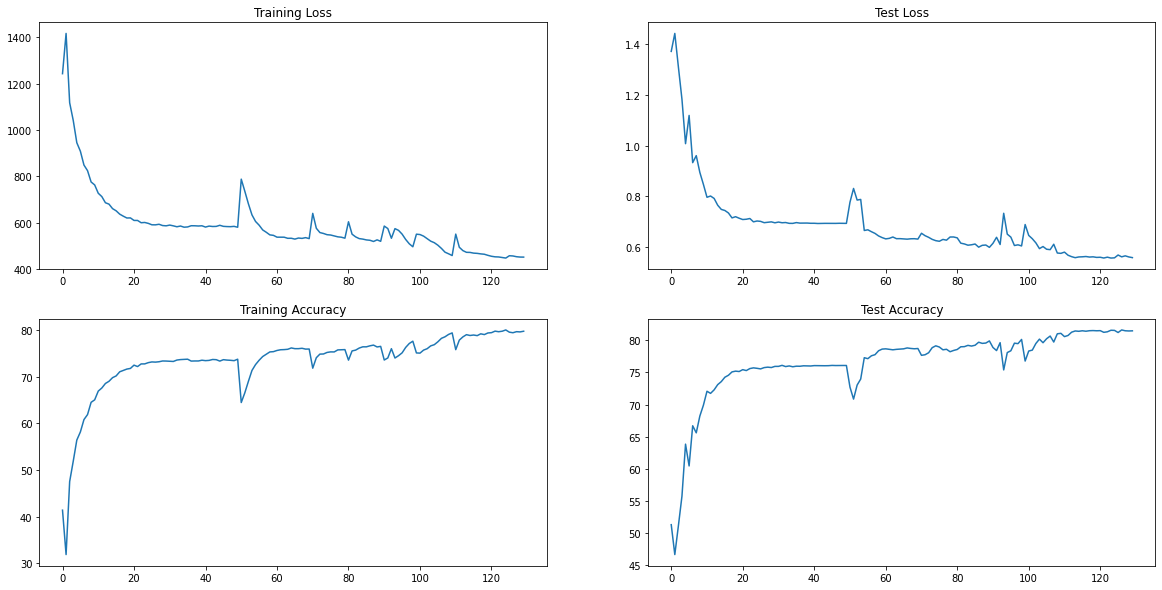

In [ ]:
plot_graphs(train_losses=train_losses, train_accuracy=train_accuracy,
            test_losses=test_losses,test_accuracy=test_accuracy)

# Ok.. that's a lot of epochs... go back to architecture, clearly things could be better. To take a look at RF again and groups as well, make sure groups get to learn separation of responsibility.

# Changing Model: code 6

In [ ]:
# transforms

# here changed CoarseDropout's p to 0.25 from default 0.5, along with minor change in MedianBlur value and HSV' value
train_transforms = A.Compose([
                                A.HorizontalFlip(p=0.25),
                                A.ShiftScaleRotate(shift_limit=0.08,scale_limit=0.1,rotate_limit=25,p=0.25),
                                A.CoarseDropout(max_holes=1, p=0.25, max_height=16,
                                                max_width=16, min_holes=1, min_height=8,
                                                min_width=8, fill_value=mean),
                                # A.MedianBlur(blur_limit=3, p=0.1),
                                A.HueSaturationValue(p=0.1),
                            #   A.GaussianBlur(blur_limit=3, p=0.12),
                                A.RandomBrightnessContrast(brightness_limit=0.09,contrast_limit=0.1, p=0.15),   
                                A.Normalize(mean=mean, std=sdev),
                                ToTensor()
                                       ])

test_transforms = A.Compose([
                            A.Normalize(mean=mean, std=sdev),
                            ToTensor()
                                    ])


In [ ]:

# data sets with transforms
train_set = Cifar10SearchDataset(train=True, download=True, transform=train_transforms)

test_set = Cifar10SearchDataset(train=False, download=True, transform=test_transforms)


# data loaders on data sets
train_loader = torch.utils.data.DataLoader(dataset=train_set, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test_set, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])
torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


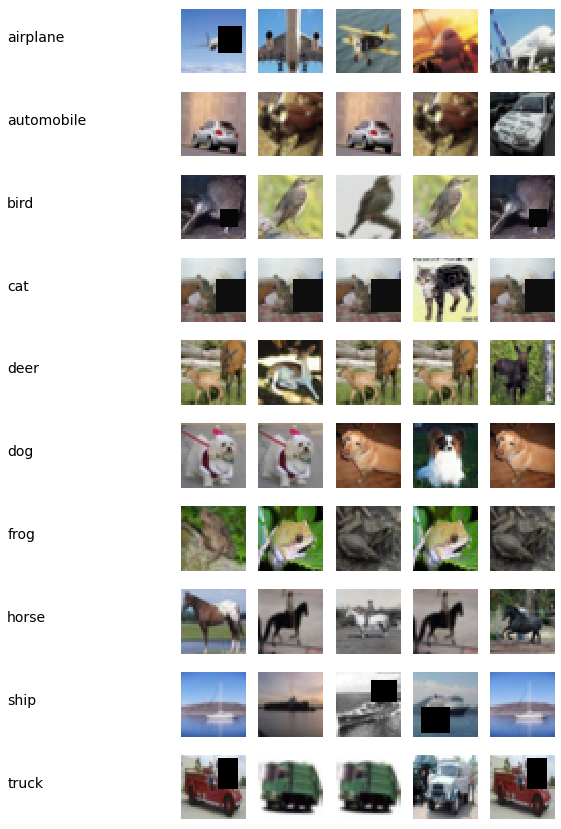

In [ ]:
from __future__ import print_function
# channel_means = (0.49196659, 0.48229005, 0.4461573)
# channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*sdev[i])+mean[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [ ]:
class Net6(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 16, 3, padding=1, dilation=1),
            relu(),
            bn(16),
            cv(16, 32, 3, dilation=2, groups=4),
            relu(),
            bn(32)
           
        )

        self.block2 = nn.Sequential(
            cv(32, 64, 3, padding=1, dilation=1, groups=8),
            relu(),
            bn(64),
            cv(64, 128, 3, padding=1, groups=32),
            relu(),
            bn(128),
            cv(128, 64, 1),
            relu(),
            bn(64)
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(64, 128, 3, dilation=2),
            relu(),
            bn(128),
            cv(128, 128, 3, groups=32, dilation=2),
            cv(128, 64, 1),
            relu(),
            bn(64),
            cv(64, 64, 3, padding=2, dilation=2, stride=2),
            relu(),
            bn(64)
        )

        self.block4 = nn.Sequential(
            cv(64, 64, 3, padding=1, groups=16),
            relu(),
            bn(64),
            cv(64, 64, 3, groups=64), # depthwise (a)
            cv(64, 32, 1), # pointwise for preceding depthwise (b)
            relu(),
            bn(32),
            cv(32, 20, 1),
            relu(),
            bn(20),
            cv(20, 10, 1),
            nn.AdaptiveAvgPool2d(1)
            # cv(10, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = Net6().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 28, 28]           1,152
              ReLU-5           [-1, 32, 28, 28]               0
       BatchNorm2d-6           [-1, 32, 28, 28]              64
            Conv2d-7           [-1, 64, 28, 28]           2,304
              ReLU-8           [-1, 64, 28, 28]               0
       BatchNorm2d-9           [-1, 64, 28, 28]             128
           Conv2d-10          [-1, 128, 28, 28]           2,304
             ReLU-11          [-1, 128, 28, 28]               0
      BatchNorm2d-12          [-1, 128, 28, 28]             256
           Conv2d-13           [-1, 64, 28, 28]           8,192
             ReLU-14           [-1, 64,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0779, momentum=0.9)
step_lr = StepLR(optimizer=optimizer, step_size=2, gamma=0.79)
# cosanl = lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=5,T_mult=2,eta_min=0.0009, verbose=True)

train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=50, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:59<00:00, 13.21it/s]



			Last LR --> [0.0779]

			Train metrics: accuracy: 21052/50000 (42.1040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.2952, accuracy: 5501/10000 (55.01000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:58<00:00, 13.26it/s]



			Last LR --> [0.0779]

			Train metrics: accuracy: 26195/50000 (52.3900%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1289, accuracy: 5967/10000 (59.67000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.061541]

			Train metrics: accuracy: 29886/50000 (59.7720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9353, accuracy: 6690/10000 (66.90000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.061541]

			Train metrics: accuracy: 31497/50000 (62.9940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.9490, accuracy: 6749/10000 (67.49000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:58<00:00, 13.28it/s]



			Last LR --> [0.04861739]

			Train metrics: accuracy: 33374/50000 (66.7480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8668, accuracy: 6983/10000 (69.83000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:58<00:00, 13.27it/s]



			Last LR --> [0.04861739]

			Train metrics: accuracy: 34430/50000 (68.8600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7784, accuracy: 7332/10000 (73.32000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:58<00:00, 13.27it/s]



			Last LR --> [0.038407738100000005]

			Train metrics: accuracy: 35616/50000 (71.2320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7493, accuracy: 7440/10000 (74.40000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:59<00:00, 13.25it/s]



			Last LR --> [0.038407738100000005]

			Train metrics: accuracy: 36241/50000 (72.4820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7220, accuracy: 7536/10000 (75.36000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:58<00:00, 13.26it/s]



			Last LR --> [0.030342113099000007]

			Train metrics: accuracy: 37380/50000 (74.7600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7318, accuracy: 7542/10000 (75.42000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.030342113099000007]

			Train metrics: accuracy: 37737/50000 (75.4740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7180, accuracy: 7519/10000 (75.19000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:59<00:00, 13.18it/s]



			Last LR --> [0.023970269348210005]

			Train metrics: accuracy: 38500/50000 (77.0000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5917, accuracy: 7955/10000 (79.55000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:59<00:00, 13.24it/s]



			Last LR --> [0.023970269348210005]

			Train metrics: accuracy: 38886/50000 (77.7720%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6429, accuracy: 7797/10000 (77.97000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:59<00:00, 13.19it/s]



			Last LR --> [0.018936512785085905]

			Train metrics: accuracy: 39443/50000 (78.8860%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5761, accuracy: 8028/10000 (80.28000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:59<00:00, 13.24it/s]



			Last LR --> [0.018936512785085905]

			Train metrics: accuracy: 39694/50000 (79.3880%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5515, accuracy: 8099/10000 (80.99000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:58<00:00, 13.28it/s]



			Last LR --> [0.014959845100217866]

			Train metrics: accuracy: 40300/50000 (80.6000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5527, accuracy: 8130/10000 (81.30000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:59<00:00, 13.24it/s]



			Last LR --> [0.014959845100217866]

			Train metrics: accuracy: 40483/50000 (80.9660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5506, accuracy: 8149/10000 (81.49000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:59<00:00, 13.25it/s]



			Last LR --> [0.011818277629172116]

			Train metrics: accuracy: 41029/50000 (82.0580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5288, accuracy: 8202/10000 (82.02000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:59<00:00, 13.24it/s]



			Last LR --> [0.011818277629172116]

			Train metrics: accuracy: 41031/50000 (82.0620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5245, accuracy: 8243/10000 (82.43000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:58<00:00, 13.26it/s]



			Last LR --> [0.009336439327045972]

			Train metrics: accuracy: 41564/50000 (83.1280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5122, accuracy: 8237/10000 (82.37000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.009336439327045972]

			Train metrics: accuracy: 41521/50000 (83.0420%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5135, accuracy: 8264/10000 (82.64000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:59<00:00, 13.21it/s]



			Last LR --> [0.007375787068366319]

			Train metrics: accuracy: 41920/50000 (83.8400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5156, accuracy: 8288/10000 (82.88000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.007375787068366319]

			Train metrics: accuracy: 42029/50000 (84.0580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5097, accuracy: 8318/10000 (83.18000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:59<00:00, 13.19it/s]



			Last LR --> [0.005826871784009392]

			Train metrics: accuracy: 42343/50000 (84.6860%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5102, accuracy: 8325/10000 (83.25000%)


 epoch num ================================= 24


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.005826871784009392]

			Train metrics: accuracy: 42372/50000 (84.7440%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5144, accuracy: 8334/10000 (83.34000%)


 epoch num ================================= 25


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.00460322870936742]

			Train metrics: accuracy: 42561/50000 (85.1220%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5119, accuracy: 8381/10000 (83.81000%)


 epoch num ================================= 26


100%|██████████| 782/782 [00:59<00:00, 13.18it/s]



			Last LR --> [0.00460322870936742]

			Train metrics: accuracy: 42637/50000 (85.2740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5002, accuracy: 8368/10000 (83.68000%)


 epoch num ================================= 27


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.003636550680400262]

			Train metrics: accuracy: 42904/50000 (85.8080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5011, accuracy: 8378/10000 (83.78000%)


 epoch num ================================= 28


100%|██████████| 782/782 [00:59<00:00, 13.25it/s]



			Last LR --> [0.003636550680400262]

			Train metrics: accuracy: 43040/50000 (86.0800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5060, accuracy: 8376/10000 (83.76000%)


 epoch num ================================= 29


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.002872875037516207]

			Train metrics: accuracy: 43019/50000 (86.0380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4932, accuracy: 8393/10000 (83.93000%)


 epoch num ================================= 30


100%|██████████| 782/782 [00:59<00:00, 13.20it/s]



			Last LR --> [0.002872875037516207]

			Train metrics: accuracy: 43179/50000 (86.3580%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4938, accuracy: 8392/10000 (83.92000%)


 epoch num ================================= 31


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.0022695712796378035]

			Train metrics: accuracy: 43249/50000 (86.4980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4885, accuracy: 8403/10000 (84.03000%)


 epoch num ================================= 32


100%|██████████| 782/782 [00:59<00:00, 13.24it/s]



			Last LR --> [0.0022695712796378035]

			Train metrics: accuracy: 43262/50000 (86.5240%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4896, accuracy: 8436/10000 (84.36000%)


 epoch num ================================= 33


100%|██████████| 782/782 [00:59<00:00, 13.21it/s]



			Last LR --> [0.0017929613109138648]

			Train metrics: accuracy: 43518/50000 (87.0360%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4967, accuracy: 8404/10000 (84.04000%)


 epoch num ================================= 34


100%|██████████| 782/782 [00:59<00:00, 13.25it/s]



			Last LR --> [0.0017929613109138648]

			Train metrics: accuracy: 43535/50000 (87.0700%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4923, accuracy: 8430/10000 (84.30000%)


 epoch num ================================= 35


100%|██████████| 782/782 [00:59<00:00, 13.20it/s]



			Last LR --> [0.0014164394356219532]

			Train metrics: accuracy: 43493/50000 (86.9860%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4974, accuracy: 8411/10000 (84.11000%)


 epoch num ================================= 36


100%|██████████| 782/782 [00:59<00:00, 13.23it/s]



			Last LR --> [0.0014164394356219532]

			Train metrics: accuracy: 43546/50000 (87.0920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4922, accuracy: 8420/10000 (84.20000%)


 epoch num ================================= 37


100%|██████████| 782/782 [00:59<00:00, 13.21it/s]



			Last LR --> [0.001118987154141343]

			Train metrics: accuracy: 43714/50000 (87.4280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4951, accuracy: 8446/10000 (84.46000%)


 epoch num ================================= 38


100%|██████████| 782/782 [00:59<00:00, 13.19it/s]



			Last LR --> [0.001118987154141343]

			Train metrics: accuracy: 43690/50000 (87.3800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4936, accuracy: 8450/10000 (84.50000%)


 epoch num ================================= 39


100%|██████████| 782/782 [00:59<00:00, 13.18it/s]



			Last LR --> [0.000883999851771661]

			Train metrics: accuracy: 43745/50000 (87.4900%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4948, accuracy: 8440/10000 (84.40000%)


 epoch num ================================= 40


100%|██████████| 782/782 [00:59<00:00, 13.17it/s]



			Last LR --> [0.000883999851771661]

			Train metrics: accuracy: 43741/50000 (87.4820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4937, accuracy: 8450/10000 (84.50000%)


 epoch num ================================= 41


100%|██████████| 782/782 [00:59<00:00, 13.16it/s]



			Last LR --> [0.0006983598828996122]

			Train metrics: accuracy: 43859/50000 (87.7180%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4935, accuracy: 8448/10000 (84.48000%)


 epoch num ================================= 42


100%|██████████| 782/782 [00:59<00:00, 13.22it/s]



			Last LR --> [0.0006983598828996122]

			Train metrics: accuracy: 43920/50000 (87.8400%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4949, accuracy: 8458/10000 (84.58000%)


 epoch num ================================= 43


100%|██████████| 782/782 [00:59<00:00, 13.19it/s]



			Last LR --> [0.0005517043074906937]

			Train metrics: accuracy: 43888/50000 (87.7760%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4926, accuracy: 8447/10000 (84.47000%)


 epoch num ================================= 44


100%|██████████| 782/782 [00:59<00:00, 13.18it/s]



			Last LR --> [0.0005517043074906937]

			Train metrics: accuracy: 43890/50000 (87.7800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4930, accuracy: 8454/10000 (84.54000%)


 epoch num ================================= 45


100%|██████████| 782/782 [00:59<00:00, 13.20it/s]



			Last LR --> [0.000435846402917648]

			Train metrics: accuracy: 43800/50000 (87.6000%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4928, accuracy: 8450/10000 (84.50000%)


 epoch num ================================= 46


100%|██████████| 782/782 [00:59<00:00, 13.17it/s]



			Last LR --> [0.000435846402917648]

			Train metrics: accuracy: 43905/50000 (87.8100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4920, accuracy: 8457/10000 (84.57000%)


 epoch num ================================= 47


100%|██████████| 782/782 [00:59<00:00, 13.25it/s]



			Last LR --> [0.00034431865830494195]

			Train metrics: accuracy: 43882/50000 (87.7640%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4920, accuracy: 8467/10000 (84.67000%)


 epoch num ================================= 48


100%|██████████| 782/782 [00:59<00:00, 13.20it/s]



			Last LR --> [0.00034431865830494195]

			Train metrics: accuracy: 43946/50000 (87.8920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4926, accuracy: 8453/10000 (84.53000%)


 epoch num ================================= 49


100%|██████████| 782/782 [00:59<00:00, 13.19it/s]



			Last LR --> [0.00027201174006090417]

			Train metrics: accuracy: 44054/50000 (88.1080%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4904, accuracy: 8464/10000 (84.64000%)


 epoch num ================================= 50


100%|██████████| 782/782 [00:59<00:00, 13.05it/s]



			Last LR --> [0.00027201174006090417]

			Train metrics: accuracy: 44001/50000 (88.0020%)



	Test metrics: average loss: 0.4919, accuracy: 8456/10000 (84.56000%)



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0039, momentum=0.9, nesterov=True)
step_lr = StepLR(optimizer=optimizer, step_size=1, gamma=0.65)


train_eval_model(model, train_loader, optimizer, device, epochs=10, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [01:00<00:00, 13.00it/s]



			Last LR --> [0.0039]

			Train metrics: accuracy: 38662/50000 (77.3240%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5124, accuracy: 8288/10000 (82.88000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:59<00:00, 13.09it/s]



			Last LR --> [0.002535]

			Train metrics: accuracy: 41489/50000 (82.9780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4911, accuracy: 8340/10000 (83.40000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [0.00164775]

			Train metrics: accuracy: 42390/50000 (84.7800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4829, accuracy: 8372/10000 (83.72000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.0010710375]

			Train metrics: accuracy: 42630/50000 (85.2600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4800, accuracy: 8375/10000 (83.75000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:59<00:00, 13.06it/s]



			Last LR --> [0.0006961743749999999]

			Train metrics: accuracy: 42881/50000 (85.7620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4757, accuracy: 8403/10000 (84.03000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.00045251334374999996]

			Train metrics: accuracy: 42831/50000 (85.6620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4779, accuracy: 8419/10000 (84.19000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:59<00:00, 13.07it/s]



			Last LR --> [0.00029413367343749996]

			Train metrics: accuracy: 43041/50000 (86.0820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4782, accuracy: 8416/10000 (84.16000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.00019118688773437498]

			Train metrics: accuracy: 42993/50000 (85.9860%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4749, accuracy: 8413/10000 (84.13000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [0.00012427147702734375]

			Train metrics: accuracy: 42964/50000 (85.9280%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4749, accuracy: 8412/10000 (84.12000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:59<00:00, 13.12it/s]



			Last LR --> [8.077646006777344e-05]

			Train metrics: accuracy: 43011/50000 (86.0220%)



	Test metrics: average loss: 0.4749, accuracy: 8416/10000 (84.16000%)



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0009, momentum=0.9, nesterov=True)
step_lr = StepLR(optimizer=optimizer, step_size=1, gamma=0.69)


train_eval_model(model, train_loader, optimizer, device, epochs=10, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:59<00:00, 13.04it/s]



			Last LR --> [0.0009]

			Train metrics: accuracy: 41010/50000 (82.0200%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4825, accuracy: 8378/10000 (83.78000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [0.0006209999999999999]

			Train metrics: accuracy: 42255/50000 (84.5100%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4817, accuracy: 8398/10000 (83.98000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.0004284899999999999]

			Train metrics: accuracy: 42439/50000 (84.8780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4744, accuracy: 8392/10000 (83.92000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:59<00:00, 13.09it/s]



			Last LR --> [0.0002956580999999999]

			Train metrics: accuracy: 42658/50000 (85.3160%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4744, accuracy: 8397/10000 (83.97000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.00020400408899999992]

			Train metrics: accuracy: 42678/50000 (85.3560%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4736, accuracy: 8407/10000 (84.07000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.00014076282140999995]

			Train metrics: accuracy: 42841/50000 (85.6820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4738, accuracy: 8414/10000 (84.14000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [9.712634677289995e-05]

			Train metrics: accuracy: 42691/50000 (85.3820%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4732, accuracy: 8405/10000 (84.05000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:59<00:00, 13.13it/s]



			Last LR --> [6.701717927330096e-05]

			Train metrics: accuracy: 42702/50000 (85.4040%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4743, accuracy: 8413/10000 (84.13000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:59<00:00, 13.12it/s]



			Last LR --> [4.624185369857766e-05]

			Train metrics: accuracy: 42787/50000 (85.5740%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4733, accuracy: 8419/10000 (84.19000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [3.1906879052018584e-05]

			Train metrics: accuracy: 42896/50000 (85.7920%)



	Test metrics: average loss: 0.4732, accuracy: 8414/10000 (84.14000%)



In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0035, momentum=0.9, nesterov=True)
step_lr = StepLR(optimizer=optimizer, step_size=1, gamma=0.79)


train_eval_model(model, train_loader, optimizer, device, epochs=40, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/782 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [0.0035]

			Train metrics: accuracy: 41447/50000 (82.8940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4758, accuracy: 8415/10000 (84.15000%)


 epoch num ================================= 2


100%|██████████| 782/782 [00:59<00:00, 13.17it/s]



			Last LR --> [0.002765]

			Train metrics: accuracy: 42539/50000 (85.0780%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4785, accuracy: 8405/10000 (84.05000%)


 epoch num ================================= 3


100%|██████████| 782/782 [00:59<00:00, 13.20it/s]



			Last LR --> [0.0021843500000000003]

			Train metrics: accuracy: 43081/50000 (86.1620%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4792, accuracy: 8438/10000 (84.38000%)


 epoch num ================================= 4


100%|██████████| 782/782 [00:59<00:00, 13.17it/s]



			Last LR --> [0.0017256365000000002]

			Train metrics: accuracy: 43101/50000 (86.2020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4758, accuracy: 8432/10000 (84.32000%)


 epoch num ================================= 5


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [0.0013632528350000003]

			Train metrics: accuracy: 43219/50000 (86.4380%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4772, accuracy: 8457/10000 (84.57000%)


 epoch num ================================= 6


100%|██████████| 782/782 [00:59<00:00, 13.07it/s]



			Last LR --> [0.0010769697396500002]

			Train metrics: accuracy: 43349/50000 (86.6980%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4767, accuracy: 8455/10000 (84.55000%)


 epoch num ================================= 7


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.0008508060943235002]

			Train metrics: accuracy: 43451/50000 (86.9020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4739, accuracy: 8453/10000 (84.53000%)


 epoch num ================================= 8


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [0.0006721368145155652]

			Train metrics: accuracy: 43530/50000 (87.0600%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4719, accuracy: 8469/10000 (84.69000%)


 epoch num ================================= 9


100%|██████████| 782/782 [00:59<00:00, 13.12it/s]



			Last LR --> [0.0005309880834672965]

			Train metrics: accuracy: 43488/50000 (86.9760%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4711, accuracy: 8473/10000 (84.73000%)


 epoch num ================================= 10


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [0.00041948058593916423]

			Train metrics: accuracy: 43546/50000 (87.0920%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4700, accuracy: 8484/10000 (84.84000%)


 epoch num ================================= 11


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [0.00033138966289193977]

			Train metrics: accuracy: 43683/50000 (87.3660%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4721, accuracy: 8461/10000 (84.61000%)


 epoch num ================================= 12


100%|██████████| 782/782 [00:59<00:00, 13.13it/s]



			Last LR --> [0.0002617978336846324]

			Train metrics: accuracy: 43697/50000 (87.3940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4709, accuracy: 8477/10000 (84.77000%)


 epoch num ================================= 13


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [0.00020682028861085963]

			Train metrics: accuracy: 43717/50000 (87.4340%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4719, accuracy: 8465/10000 (84.65000%)


 epoch num ================================= 14


100%|██████████| 782/782 [00:59<00:00, 13.13it/s]



			Last LR --> [0.0001633880280025791]

			Train metrics: accuracy: 43716/50000 (87.4320%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4709, accuracy: 8464/10000 (84.64000%)


 epoch num ================================= 15


100%|██████████| 782/782 [00:59<00:00, 13.16it/s]



			Last LR --> [0.0001290765421220375]

			Train metrics: accuracy: 43708/50000 (87.4160%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4716, accuracy: 8465/10000 (84.65000%)


 epoch num ================================= 16


100%|██████████| 782/782 [00:59<00:00, 13.12it/s]



			Last LR --> [0.00010197046827640962]

			Train metrics: accuracy: 43590/50000 (87.1800%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4703, accuracy: 8466/10000 (84.66000%)


 epoch num ================================= 17


100%|██████████| 782/782 [00:59<00:00, 13.10it/s]



			Last LR --> [8.05566699383636e-05]

			Train metrics: accuracy: 43651/50000 (87.3020%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4701, accuracy: 8466/10000 (84.66000%)


 epoch num ================================= 18


100%|██████████| 782/782 [00:59<00:00, 13.15it/s]



			Last LR --> [6.363976925130726e-05]

			Train metrics: accuracy: 43753/50000 (87.5060%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4706, accuracy: 8470/10000 (84.70000%)


 epoch num ================================= 19


100%|██████████| 782/782 [00:59<00:00, 13.14it/s]



			Last LR --> [5.0275417708532736e-05]

			Train metrics: accuracy: 43760/50000 (87.5200%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4705, accuracy: 8472/10000 (84.72000%)


 epoch num ================================= 20


100%|██████████| 782/782 [00:59<00:00, 13.12it/s]



			Last LR --> [3.9717579989740865e-05]

			Train metrics: accuracy: 43647/50000 (87.2940%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4701, accuracy: 8470/10000 (84.70000%)


 epoch num ================================= 21


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [3.137688819189528e-05]

			Train metrics: accuracy: 43874/50000 (87.7480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4707, accuracy: 8475/10000 (84.75000%)


 epoch num ================================= 22


100%|██████████| 782/782 [00:59<00:00, 13.11it/s]



			Last LR --> [2.4787741671597274e-05]

			Train metrics: accuracy: 43724/50000 (87.4480%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4704, accuracy: 8475/10000 (84.75000%)


 epoch num ================================= 23


100%|██████████| 782/782 [00:59<00:00, 13.08it/s]



			Last LR --> [1.9582315920561846e-05]

			Train metrics: accuracy: 43709/50000 (87.4180%)



  0%|          | 0/782 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4705, accuracy: 8469/10000 (84.69000%)


 epoch num ================================= 24


 46%|████▌     | 361/782 [00:27<00:32, 13.01it/s]

KeyboardInterrupt: ignored

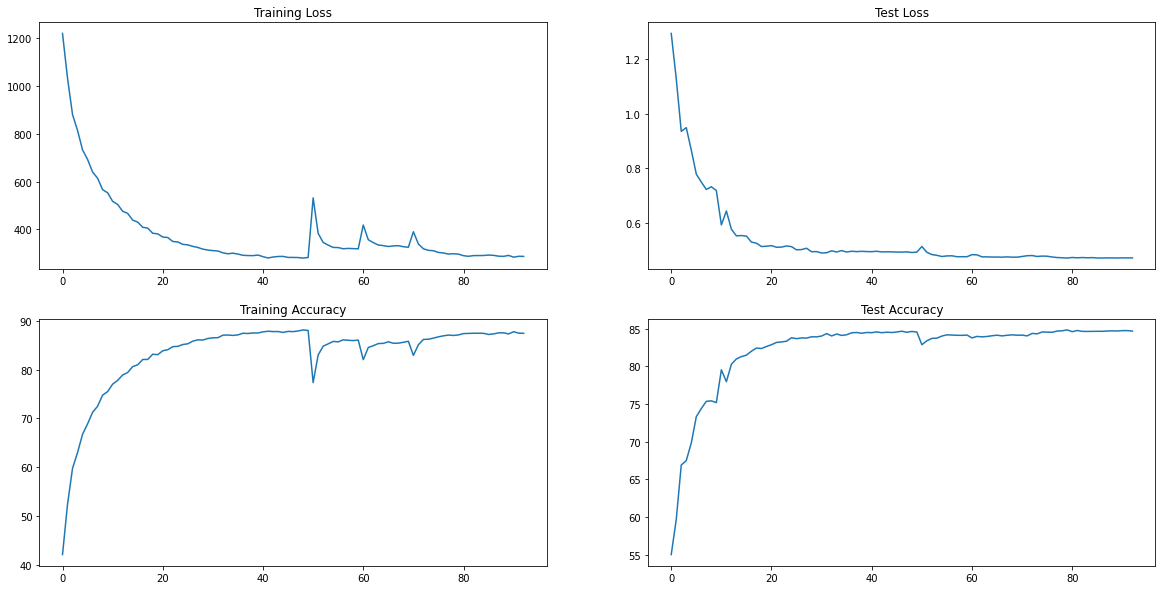

In [ ]:
plot_graphs(train_losses=train_losses, train_accuracy=train_accuracy,
            test_losses=test_losses,test_accuracy=test_accuracy)

# Something is wrong! The model is unable to actually learn further.

# Code 7

In [ ]:
# transforms

# here changed CoarseDropout's p to 0.25 from default 0.5, along with minor change in MedianBlur value and HSV' value
train_transforms = A.Compose([
                                A.HorizontalFlip(p=0.2),
                                A.ShiftScaleRotate(shift_limit=0.1,scale_limit=0.15,rotate_limit=30,p=0.20),
                                A.CoarseDropout(max_holes=1, p=0.15, max_height=16,
                                                max_width=16, min_holes=1, min_height=16,
                                                min_width=16, fill_value=mean),
                                # A.MedianBlur(blur_limit=3, p=0.1),
                                # A.HueSaturationValue(p=0.1),
                            #   A.GaussianBlur(blur_limit=3, p=0.12),
                                # A.RandomBrightnessContrast(brightness_limit=0.09,contrast_limit=0.1, p=0.15),   
                                A.Normalize(mean=mean, std=sdev),
                                ToTensor()
                                       ])

test_transforms = A.Compose([
                            A.Normalize(mean=mean, std=sdev),
                            ToTensor()
                                    ])


In [ ]:

# data sets with transforms
train_set = Cifar10SearchDataset(train=True, download=True, transform=train_transforms)

test_set = Cifar10SearchDataset(train=False, download=True, transform=test_transforms)


# data loaders on data sets
train_loader = torch.utils.data.DataLoader(dataset=train_set, **dataloader_args)

test_loader = torch.utils.data.DataLoader(test_set, **dataloader_args)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 32, 32])
torch.Size([128])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


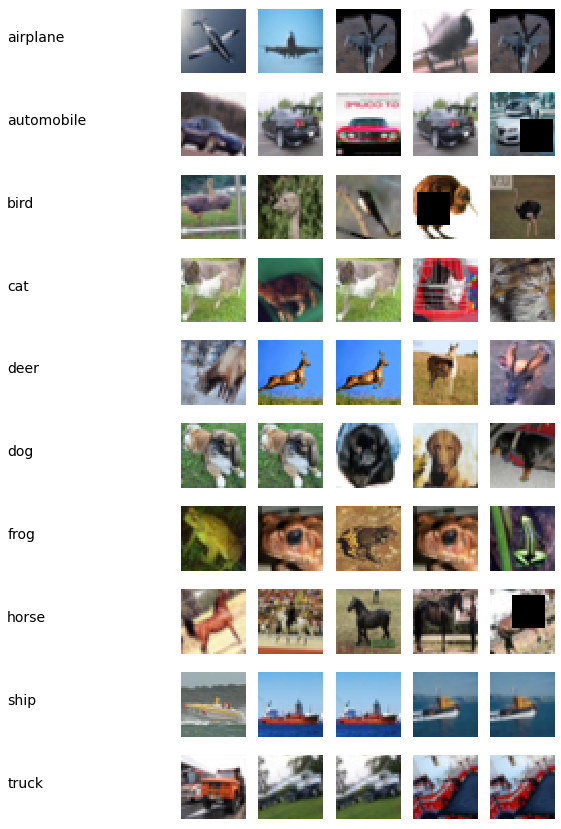

In [ ]:
from __future__ import print_function
# channel_means = (0.49196659, 0.48229005, 0.4461573)
# channel_stdevs = (0.24703223, 0.24348513, 0.26158784)
def unnormalize(img):
  img = img.numpy().astype(dtype=np.float32)
  
  for i in range(img.shape[0]):
    img[i] = (img[i]*sdev[i])+mean[i]
  
  return np.transpose(img, (1,2,0))

%matplotlib inline
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

num_classes = 10
# display 10 images from each category. 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
r, c = 10, 11
n = 5
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(num_classes):
    idx = np.random.choice(np.where(labels[:]==i)[0], n)
    ax = plt.subplot(r, c, i*c+1)
    ax.text(-1.5, 0.5, class_names[i], fontsize=14)
    plt.axis('off')
    for j in range(1, n+1):
      plt.subplot(r, c, i*c+j+1)
      plt.imshow(unnormalize(images[idx[j-1]]), interpolation='none')
      plt.axis('off')
plt.show()

In [ ]:
class Net7(nn.Module):
    def __init__(self):
        super().__init__()

        self.block1 = nn.Sequential(
            cv(3, 24, 3, padding=1),
            relu(),
            bn(24),
            cv(24, 64, 3, dilation=2, groups=8, padding=1),
            relu(),
            bn(64),
            nn.Dropout2d(0.08)
           
        )

        self.block2 = nn.Sequential(
            cv(64, 64, 3, padding=1, dilation=1, groups=16),
            relu(),
            bn(64),
            cv(64, 80, 3, dilation=2, padding=1, groups=8),
            relu(),
            bn(80),
            cv(80, 64, 1),
            relu(),
            bn(64),
            nn.Dropout2d(0.08)
            # Conv2d(32, 32, 3, padding=2, dilation=2, stride=2)
        )

        self.block3 = nn.Sequential(
            cv(64, 128, 3, dilation=2, groups=16),
            relu(),
            bn(128),
            cv(128, 256, 3, groups=128, dilation=2, padding=1),
            cv(256, 64, 1),
            relu(),
            bn(64),
            cv(64, 128, 3, padding=2, dilation=2, stride=2),
            relu(),
            bn(128),
            nn.Dropout2d(0.08)
        )

        self.block4 = nn.Sequential(
            cv(128, 256, 3, padding=1, groups=32, stride=1, dilation=2),
            cv(256, 64, 1),
            relu(),
            bn(64),
            cv(64, 64, 3, groups=64, padding=1), # depthwise (a)
            cv(64, 32, 1), # pointwise for preceding depthwise (b)
            relu(),
            bn(32),
            nn.Dropout2d(0.05),
            cv(32, 32, 3, dilation=1, groups=16),
            relu(),
            bn(32),
            # cv(32, 10, 1),
            nn.AdaptiveAvgPool2d(1),
            cv(32, 10, 1)
        )
    
        
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


model = Net7().to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 32, 32]             648
              ReLU-2           [-1, 24, 32, 32]               0
       BatchNorm2d-3           [-1, 24, 32, 32]              48
            Conv2d-4           [-1, 64, 30, 30]           1,728
              ReLU-5           [-1, 64, 30, 30]               0
       BatchNorm2d-6           [-1, 64, 30, 30]             128
         Dropout2d-7           [-1, 64, 30, 30]               0
            Conv2d-8           [-1, 64, 30, 30]           2,304
              ReLU-9           [-1, 64, 30, 30]               0
      BatchNorm2d-10           [-1, 64, 30, 30]             128
           Conv2d-11           [-1, 80, 28, 28]           5,760
             ReLU-12           [-1, 80, 28, 28]               0
      BatchNorm2d-13           [-1, 80, 28, 28]             160
           Conv2d-14           [-1, 64,

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.08993, momentum=0.9, nesterov=True)
step_lr = StepLR(optimizer=optimizer, step_size=3, gamma=0.77)

train_losses = []
train_accuracy = []
test_losses = []
test_accuracy = []

train_eval_model(model, train_loader, optimizer, device, epochs=100, test=True, test_loader=test_loader,scheduler=step_lr)

  0%|          | 0/391 [00:00<?, ?it/s]


 epoch num ================================= 1


100%|██████████| 391/391 [00:11<00:00, 34.50it/s]



			Last LR --> [0.08993]

			Train metrics: accuracy: 22432/50000 (44.8640%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 1.1219, accuracy: 5963/10000 (59.63000%)


 epoch num ================================= 2


100%|██████████| 391/391 [00:10<00:00, 35.82it/s]




			Last LR --> [0.08993]

			Train metrics: accuracy: 28733/50000 (57.4660%)


  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 1.0764, accuracy: 6191/10000 (61.91000%)


 epoch num ================================= 3


100%|██████████| 391/391 [00:11<00:00, 35.17it/s]



			Last LR --> [0.08993]

			Train metrics: accuracy: 32012/50000 (64.0240%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.8592, accuracy: 7021/10000 (70.21000%)


 epoch num ================================= 4


100%|██████████| 391/391 [00:11<00:00, 34.95it/s]



			Last LR --> [0.0692461]

			Train metrics: accuracy: 34463/50000 (68.9260%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7607, accuracy: 7350/10000 (73.50000%)


 epoch num ================================= 5


100%|██████████| 391/391 [00:11<00:00, 35.41it/s]



			Last LR --> [0.0692461]

			Train metrics: accuracy: 35450/50000 (70.9000%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7218, accuracy: 7507/10000 (75.07000%)


 epoch num ================================= 6


100%|██████████| 391/391 [00:10<00:00, 35.68it/s]




			Last LR --> [0.0692461]

			Train metrics: accuracy: 36290/50000 (72.5800%)


  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.7237, accuracy: 7511/10000 (75.11000%)


 epoch num ================================= 7


100%|██████████| 391/391 [00:10<00:00, 35.76it/s]



			Last LR --> [0.05331949700000001]

			Train metrics: accuracy: 37662/50000 (75.3240%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6536, accuracy: 7714/10000 (77.14000%)


 epoch num ================================= 8


100%|██████████| 391/391 [00:11<00:00, 35.29it/s]



			Last LR --> [0.05331949700000001]

			Train metrics: accuracy: 38088/50000 (76.1760%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6467, accuracy: 7793/10000 (77.93000%)


 epoch num ================================= 9


100%|██████████| 391/391 [00:11<00:00, 35.00it/s]



			Last LR --> [0.05331949700000001]

			Train metrics: accuracy: 38526/50000 (77.0520%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.6244, accuracy: 7914/10000 (79.14000%)


 epoch num ================================= 10


100%|██████████| 391/391 [00:11<00:00, 35.51it/s]



			Last LR --> [0.041056012690000004]

			Train metrics: accuracy: 39371/50000 (78.7420%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5766, accuracy: 7996/10000 (79.96000%)


 epoch num ================================= 11


100%|██████████| 391/391 [00:11<00:00, 35.28it/s]



			Last LR --> [0.041056012690000004]

			Train metrics: accuracy: 39620/50000 (79.2400%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5689, accuracy: 8095/10000 (80.95000%)


 epoch num ================================= 12


100%|██████████| 391/391 [00:11<00:00, 35.20it/s]



			Last LR --> [0.041056012690000004]

			Train metrics: accuracy: 40037/50000 (80.0740%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5557, accuracy: 8093/10000 (80.93000%)


 epoch num ================================= 13


100%|██████████| 391/391 [00:11<00:00, 34.87it/s]



			Last LR --> [0.03161312977130001]

			Train metrics: accuracy: 40695/50000 (81.3900%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5186, accuracy: 8236/10000 (82.36000%)


 epoch num ================================= 14


100%|██████████| 391/391 [00:11<00:00, 34.76it/s]



			Last LR --> [0.03161312977130001]

			Train metrics: accuracy: 41127/50000 (82.2540%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5231, accuracy: 8243/10000 (82.43000%)


 epoch num ================================= 15


100%|██████████| 391/391 [00:11<00:00, 35.43it/s]



			Last LR --> [0.03161312977130001]

			Train metrics: accuracy: 41242/50000 (82.4840%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5024, accuracy: 8305/10000 (83.05000%)


 epoch num ================================= 16


100%|██████████| 391/391 [00:11<00:00, 34.97it/s]



			Last LR --> [0.024342109923901005]

			Train metrics: accuracy: 41734/50000 (83.4680%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4978, accuracy: 8357/10000 (83.57000%)


 epoch num ================================= 17


100%|██████████| 391/391 [00:11<00:00, 34.72it/s]



			Last LR --> [0.024342109923901005]

			Train metrics: accuracy: 41944/50000 (83.8880%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5137, accuracy: 8303/10000 (83.03000%)


 epoch num ================================= 18


100%|██████████| 391/391 [00:11<00:00, 35.27it/s]



			Last LR --> [0.024342109923901005]

			Train metrics: accuracy: 42096/50000 (84.1920%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4893, accuracy: 8357/10000 (83.57000%)


 epoch num ================================= 19


100%|██████████| 391/391 [00:11<00:00, 35.21it/s]



			Last LR --> [0.018743424641403775]

			Train metrics: accuracy: 42573/50000 (85.1460%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4911, accuracy: 8393/10000 (83.93000%)


 epoch num ================================= 20


100%|██████████| 391/391 [00:11<00:00, 35.24it/s]



			Last LR --> [0.018743424641403775]

			Train metrics: accuracy: 42670/50000 (85.3400%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4986, accuracy: 8379/10000 (83.79000%)


 epoch num ================================= 21


100%|██████████| 391/391 [00:11<00:00, 35.44it/s]



			Last LR --> [0.018743424641403775]

			Train metrics: accuracy: 42907/50000 (85.8140%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4827, accuracy: 8428/10000 (84.28000%)


 epoch num ================================= 22


100%|██████████| 391/391 [00:11<00:00, 35.36it/s]



			Last LR --> [0.014432436973880908]

			Train metrics: accuracy: 43205/50000 (86.4100%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4771, accuracy: 8475/10000 (84.75000%)


 epoch num ================================= 23


100%|██████████| 391/391 [00:11<00:00, 34.41it/s]



			Last LR --> [0.014432436973880908]

			Train metrics: accuracy: 43410/50000 (86.8200%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4843, accuracy: 8469/10000 (84.69000%)


 epoch num ================================= 24


100%|██████████| 391/391 [00:11<00:00, 34.07it/s]



			Last LR --> [0.014432436973880908]

			Train metrics: accuracy: 43615/50000 (87.2300%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4931, accuracy: 8407/10000 (84.07000%)


 epoch num ================================= 25


100%|██████████| 391/391 [00:11<00:00, 34.65it/s]



			Last LR --> [0.0111129764698883]

			Train metrics: accuracy: 43722/50000 (87.4440%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4881, accuracy: 8417/10000 (84.17000%)


 epoch num ================================= 26


100%|██████████| 391/391 [00:10<00:00, 35.59it/s]



			Last LR --> [0.0111129764698883]

			Train metrics: accuracy: 43919/50000 (87.8380%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5201, accuracy: 8374/10000 (83.74000%)


 epoch num ================================= 27


100%|██████████| 391/391 [00:11<00:00, 35.51it/s]



			Last LR --> [0.0111129764698883]

			Train metrics: accuracy: 44092/50000 (88.1840%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5112, accuracy: 8488/10000 (84.88000%)


 epoch num ================================= 28


100%|██████████| 391/391 [00:11<00:00, 34.73it/s]



			Last LR --> [0.008556991881813992]

			Train metrics: accuracy: 44206/50000 (88.4120%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4797, accuracy: 8512/10000 (85.12000%)


 epoch num ================================= 29


100%|██████████| 391/391 [00:11<00:00, 35.13it/s]



			Last LR --> [0.008556991881813992]

			Train metrics: accuracy: 44351/50000 (88.7020%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4873, accuracy: 8500/10000 (85.00000%)


 epoch num ================================= 30


100%|██████████| 391/391 [00:11<00:00, 34.39it/s]



			Last LR --> [0.008556991881813992]

			Train metrics: accuracy: 44464/50000 (88.9280%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4778, accuracy: 8490/10000 (84.90000%)


 epoch num ================================= 31


100%|██████████| 391/391 [00:11<00:00, 34.78it/s]



			Last LR --> [0.006588883748996774]

			Train metrics: accuracy: 44647/50000 (89.2940%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4875, accuracy: 8503/10000 (85.03000%)


 epoch num ================================= 32


100%|██████████| 391/391 [00:11<00:00, 35.21it/s]



			Last LR --> [0.006588883748996774]

			Train metrics: accuracy: 44807/50000 (89.6140%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4948, accuracy: 8494/10000 (84.94000%)


 epoch num ================================= 33


100%|██████████| 391/391 [00:11<00:00, 34.12it/s]



			Last LR --> [0.006588883748996774]

			Train metrics: accuracy: 44758/50000 (89.5160%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4903, accuracy: 8516/10000 (85.16000%)


 epoch num ================================= 34


100%|██████████| 391/391 [00:11<00:00, 34.67it/s]



			Last LR --> [0.005073440486727516]

			Train metrics: accuracy: 44852/50000 (89.7040%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4755, accuracy: 8534/10000 (85.34000%)


 epoch num ================================= 35


100%|██████████| 391/391 [00:11<00:00, 35.06it/s]



			Last LR --> [0.005073440486727516]

			Train metrics: accuracy: 44985/50000 (89.9700%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4783, accuracy: 8525/10000 (85.25000%)


 epoch num ================================= 36


100%|██████████| 391/391 [00:11<00:00, 34.92it/s]



			Last LR --> [0.005073440486727516]

			Train metrics: accuracy: 44983/50000 (89.9660%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4788, accuracy: 8527/10000 (85.27000%)


 epoch num ================================= 37


100%|██████████| 391/391 [00:11<00:00, 35.04it/s]



			Last LR --> [0.003906549174780187]

			Train metrics: accuracy: 45268/50000 (90.5360%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4830, accuracy: 8531/10000 (85.31000%)


 epoch num ================================= 38


100%|██████████| 391/391 [00:11<00:00, 34.28it/s]



			Last LR --> [0.003906549174780187]

			Train metrics: accuracy: 45188/50000 (90.3760%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4928, accuracy: 8527/10000 (85.27000%)


 epoch num ================================= 39


100%|██████████| 391/391 [00:11<00:00, 34.91it/s]



			Last LR --> [0.003906549174780187]

			Train metrics: accuracy: 45324/50000 (90.6480%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4962, accuracy: 8517/10000 (85.17000%)


 epoch num ================================= 40


100%|██████████| 391/391 [00:11<00:00, 34.99it/s]



			Last LR --> [0.0030080428645807445]

			Train metrics: accuracy: 45421/50000 (90.8420%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4837, accuracy: 8562/10000 (85.62000%)


 epoch num ================================= 41


100%|██████████| 391/391 [00:11<00:00, 34.67it/s]



			Last LR --> [0.0030080428645807445]

			Train metrics: accuracy: 45404/50000 (90.8080%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4870, accuracy: 8559/10000 (85.59000%)


 epoch num ================================= 42


100%|██████████| 391/391 [00:11<00:00, 35.04it/s]



			Last LR --> [0.0030080428645807445]

			Train metrics: accuracy: 45380/50000 (90.7600%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4911, accuracy: 8539/10000 (85.39000%)


 epoch num ================================= 43


100%|██████████| 391/391 [00:11<00:00, 34.28it/s]



			Last LR --> [0.0023161930057271733]

			Train metrics: accuracy: 45378/50000 (90.7560%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4891, accuracy: 8552/10000 (85.52000%)


 epoch num ================================= 44


100%|██████████| 391/391 [00:11<00:00, 34.93it/s]



			Last LR --> [0.0023161930057271733]

			Train metrics: accuracy: 45430/50000 (90.8600%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4913, accuracy: 8533/10000 (85.33000%)


 epoch num ================================= 45


100%|██████████| 391/391 [00:11<00:00, 35.23it/s]



			Last LR --> [0.0023161930057271733]

			Train metrics: accuracy: 45606/50000 (91.2120%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4932, accuracy: 8546/10000 (85.46000%)


 epoch num ================================= 46


100%|██████████| 391/391 [00:11<00:00, 34.91it/s]



			Last LR --> [0.0017834686144099234]

			Train metrics: accuracy: 45539/50000 (91.0780%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4921, accuracy: 8552/10000 (85.52000%)


 epoch num ================================= 47


100%|██████████| 391/391 [00:11<00:00, 35.07it/s]



			Last LR --> [0.0017834686144099234]

			Train metrics: accuracy: 45656/50000 (91.3120%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4945, accuracy: 8568/10000 (85.68000%)


 epoch num ================================= 48


100%|██████████| 391/391 [00:11<00:00, 34.10it/s]



			Last LR --> [0.0017834686144099234]

			Train metrics: accuracy: 45674/50000 (91.3480%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4910, accuracy: 8562/10000 (85.62000%)


 epoch num ================================= 49


100%|██████████| 391/391 [00:11<00:00, 33.96it/s]



			Last LR --> [0.001373270833095641]

			Train metrics: accuracy: 45602/50000 (91.2040%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4948, accuracy: 8542/10000 (85.42000%)


 epoch num ================================= 50


100%|██████████| 391/391 [00:11<00:00, 34.71it/s]



			Last LR --> [0.001373270833095641]

			Train metrics: accuracy: 45617/50000 (91.2340%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4910, accuracy: 8553/10000 (85.53000%)


 epoch num ================================= 51


100%|██████████| 391/391 [00:11<00:00, 34.68it/s]



			Last LR --> [0.001373270833095641]

			Train metrics: accuracy: 45720/50000 (91.4400%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4962, accuracy: 8550/10000 (85.50000%)


 epoch num ================================= 52


100%|██████████| 391/391 [00:11<00:00, 34.50it/s]



			Last LR --> [0.0010574185414836436]

			Train metrics: accuracy: 45700/50000 (91.4000%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.5024, accuracy: 8561/10000 (85.61000%)


 epoch num ================================= 53


100%|██████████| 391/391 [00:11<00:00, 34.95it/s]



			Last LR --> [0.0010574185414836436]

			Train metrics: accuracy: 45729/50000 (91.4580%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4957, accuracy: 8560/10000 (85.60000%)


 epoch num ================================= 54


100%|██████████| 391/391 [00:11<00:00, 34.27it/s]



			Last LR --> [0.0010574185414836436]

			Train metrics: accuracy: 45737/50000 (91.4740%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4962, accuracy: 8555/10000 (85.55000%)


 epoch num ================================= 55


100%|██████████| 391/391 [00:11<00:00, 34.56it/s]



			Last LR --> [0.0008142122769424056]

			Train metrics: accuracy: 45773/50000 (91.5460%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4971, accuracy: 8558/10000 (85.58000%)


 epoch num ================================= 56


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]




			Last LR --> [0.0008142122769424056]

			Train metrics: accuracy: 45726/50000 (91.4520%)


  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4959, accuracy: 8572/10000 (85.72000%)


 epoch num ================================= 57


100%|██████████| 391/391 [00:11<00:00, 33.74it/s]



			Last LR --> [0.0008142122769424056]

			Train metrics: accuracy: 45833/50000 (91.6660%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4905, accuracy: 8576/10000 (85.76000%)


 epoch num ================================= 58


100%|██████████| 391/391 [00:11<00:00, 34.00it/s]



			Last LR --> [0.0006269434532456523]

			Train metrics: accuracy: 45771/50000 (91.5420%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4958, accuracy: 8555/10000 (85.55000%)


 epoch num ================================= 59


100%|██████████| 391/391 [00:11<00:00, 33.93it/s]



			Last LR --> [0.0006269434532456523]

			Train metrics: accuracy: 45867/50000 (91.7340%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4938, accuracy: 8567/10000 (85.67000%)


 epoch num ================================= 60


100%|██████████| 391/391 [00:11<00:00, 34.42it/s]



			Last LR --> [0.0006269434532456523]

			Train metrics: accuracy: 45855/50000 (91.7100%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4960, accuracy: 8555/10000 (85.55000%)


 epoch num ================================= 61


100%|██████████| 391/391 [00:11<00:00, 34.70it/s]



			Last LR --> [0.00048274645899915226]

			Train metrics: accuracy: 45797/50000 (91.5940%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4981, accuracy: 8554/10000 (85.54000%)


 epoch num ================================= 62


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]



			Last LR --> [0.00048274645899915226]

			Train metrics: accuracy: 45945/50000 (91.8900%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4983, accuracy: 8571/10000 (85.71000%)


 epoch num ================================= 63


100%|██████████| 391/391 [00:11<00:00, 34.24it/s]



			Last LR --> [0.00048274645899915226]

			Train metrics: accuracy: 45824/50000 (91.6480%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4953, accuracy: 8558/10000 (85.58000%)


 epoch num ================================= 64


100%|██████████| 391/391 [00:11<00:00, 34.52it/s]



			Last LR --> [0.00037171477342934725]

			Train metrics: accuracy: 45827/50000 (91.6540%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4947, accuracy: 8546/10000 (85.46000%)


 epoch num ================================= 65


100%|██████████| 391/391 [00:11<00:00, 34.37it/s]



			Last LR --> [0.00037171477342934725]

			Train metrics: accuracy: 45819/50000 (91.6380%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4972, accuracy: 8557/10000 (85.57000%)


 epoch num ================================= 66


100%|██████████| 391/391 [00:11<00:00, 34.35it/s]



			Last LR --> [0.00037171477342934725]

			Train metrics: accuracy: 45927/50000 (91.8540%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4957, accuracy: 8562/10000 (85.62000%)


 epoch num ================================= 67


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]



			Last LR --> [0.0002862203755405974]

			Train metrics: accuracy: 45942/50000 (91.8840%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4965, accuracy: 8580/10000 (85.80000%)


 epoch num ================================= 68


100%|██████████| 391/391 [00:11<00:00, 33.55it/s]



			Last LR --> [0.0002862203755405974]

			Train metrics: accuracy: 45896/50000 (91.7920%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4955, accuracy: 8569/10000 (85.69000%)


 epoch num ================================= 69


100%|██████████| 391/391 [00:11<00:00, 33.56it/s]



			Last LR --> [0.0002862203755405974]

			Train metrics: accuracy: 45864/50000 (91.7280%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4958, accuracy: 8576/10000 (85.76000%)


 epoch num ================================= 70


100%|██████████| 391/391 [00:11<00:00, 33.07it/s]



			Last LR --> [0.00022038968916625998]

			Train metrics: accuracy: 45875/50000 (91.7500%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4951, accuracy: 8573/10000 (85.73000%)


 epoch num ================================= 71


100%|██████████| 391/391 [00:11<00:00, 34.41it/s]



			Last LR --> [0.00022038968916625998]

			Train metrics: accuracy: 45913/50000 (91.8260%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4968, accuracy: 8574/10000 (85.74000%)


 epoch num ================================= 72


100%|██████████| 391/391 [00:11<00:00, 33.93it/s]



			Last LR --> [0.00022038968916625998]

			Train metrics: accuracy: 45864/50000 (91.7280%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4976, accuracy: 8561/10000 (85.61000%)


 epoch num ================================= 73


100%|██████████| 391/391 [00:11<00:00, 34.85it/s]



			Last LR --> [0.0001697000606580202]

			Train metrics: accuracy: 45778/50000 (91.5560%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4967, accuracy: 8566/10000 (85.66000%)


 epoch num ================================= 74


100%|██████████| 391/391 [00:11<00:00, 35.01it/s]



			Last LR --> [0.0001697000606580202]

			Train metrics: accuracy: 45836/50000 (91.6720%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4952, accuracy: 8567/10000 (85.67000%)


 epoch num ================================= 75


100%|██████████| 391/391 [00:11<00:00, 34.90it/s]



			Last LR --> [0.0001697000606580202]

			Train metrics: accuracy: 45970/50000 (91.9400%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4962, accuracy: 8568/10000 (85.68000%)


 epoch num ================================= 76


100%|██████████| 391/391 [00:11<00:00, 35.18it/s]



			Last LR --> [0.00013066904670667556]

			Train metrics: accuracy: 45864/50000 (91.7280%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8562/10000 (85.62000%)


 epoch num ================================= 77


100%|██████████| 391/391 [00:11<00:00, 34.40it/s]



			Last LR --> [0.00013066904670667556]

			Train metrics: accuracy: 45884/50000 (91.7680%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4970, accuracy: 8565/10000 (85.65000%)


 epoch num ================================= 78


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]



			Last LR --> [0.00013066904670667556]

			Train metrics: accuracy: 45951/50000 (91.9020%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4957, accuracy: 8565/10000 (85.65000%)


 epoch num ================================= 79


100%|██████████| 391/391 [00:11<00:00, 34.13it/s]



			Last LR --> [0.00010061516596414019]

			Train metrics: accuracy: 46011/50000 (92.0220%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8563/10000 (85.63000%)


 epoch num ================================= 80


100%|██████████| 391/391 [00:11<00:00, 34.06it/s]



			Last LR --> [0.00010061516596414019]

			Train metrics: accuracy: 45888/50000 (91.7760%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4966, accuracy: 8570/10000 (85.70000%)


 epoch num ================================= 81


100%|██████████| 391/391 [00:11<00:00, 33.96it/s]



			Last LR --> [0.00010061516596414019]

			Train metrics: accuracy: 45971/50000 (91.9420%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4971, accuracy: 8574/10000 (85.74000%)


 epoch num ================================= 82


100%|██████████| 391/391 [00:11<00:00, 34.37it/s]



			Last LR --> [7.747367779238795e-05]

			Train metrics: accuracy: 45886/50000 (91.7720%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4969, accuracy: 8575/10000 (85.75000%)


 epoch num ================================= 83


100%|██████████| 391/391 [00:11<00:00, 33.49it/s]



			Last LR --> [7.747367779238795e-05]

			Train metrics: accuracy: 45861/50000 (91.7220%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4978, accuracy: 8572/10000 (85.72000%)


 epoch num ================================= 84


100%|██████████| 391/391 [00:11<00:00, 34.33it/s]



			Last LR --> [7.747367779238795e-05]

			Train metrics: accuracy: 45932/50000 (91.8640%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4981, accuracy: 8565/10000 (85.65000%)


 epoch num ================================= 85


100%|██████████| 391/391 [00:11<00:00, 33.83it/s]



			Last LR --> [5.965473190013872e-05]

			Train metrics: accuracy: 45830/50000 (91.6600%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4981, accuracy: 8569/10000 (85.69000%)


 epoch num ================================= 86


100%|██████████| 391/391 [00:11<00:00, 33.65it/s]



			Last LR --> [5.965473190013872e-05]

			Train metrics: accuracy: 45897/50000 (91.7940%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4966, accuracy: 8576/10000 (85.76000%)


 epoch num ================================= 87


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]



			Last LR --> [5.965473190013872e-05]

			Train metrics: accuracy: 45942/50000 (91.8840%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4971, accuracy: 8572/10000 (85.72000%)


 epoch num ================================= 88


100%|██████████| 391/391 [00:11<00:00, 34.83it/s]



			Last LR --> [4.5934143563106814e-05]

			Train metrics: accuracy: 45875/50000 (91.7500%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8580/10000 (85.80000%)


 epoch num ================================= 89


100%|██████████| 391/391 [00:11<00:00, 34.46it/s]



			Last LR --> [4.5934143563106814e-05]

			Train metrics: accuracy: 45939/50000 (91.8780%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8576/10000 (85.76000%)


 epoch num ================================= 90


100%|██████████| 391/391 [00:11<00:00, 33.63it/s]



			Last LR --> [4.5934143563106814e-05]

			Train metrics: accuracy: 45946/50000 (91.8920%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4976, accuracy: 8584/10000 (85.84000%)


 epoch num ================================= 91


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]




			Last LR --> [3.536929054359225e-05]

			Train metrics: accuracy: 45827/50000 (91.6540%)


  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4967, accuracy: 8577/10000 (85.77000%)


 epoch num ================================= 92


100%|██████████| 391/391 [00:11<00:00, 34.16it/s]



			Last LR --> [3.536929054359225e-05]

			Train metrics: accuracy: 45839/50000 (91.6780%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4970, accuracy: 8575/10000 (85.75000%)


 epoch num ================================= 93


100%|██████████| 391/391 [00:11<00:00, 34.29it/s]



			Last LR --> [3.536929054359225e-05]

			Train metrics: accuracy: 45823/50000 (91.6460%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4972, accuracy: 8581/10000 (85.81000%)


 epoch num ================================= 94


100%|██████████| 391/391 [00:11<00:00, 34.25it/s]



			Last LR --> [2.7234353718566035e-05]

			Train metrics: accuracy: 45899/50000 (91.7980%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4968, accuracy: 8577/10000 (85.77000%)


 epoch num ================================= 95


100%|██████████| 391/391 [00:11<00:00, 34.32it/s]



			Last LR --> [2.7234353718566035e-05]

			Train metrics: accuracy: 45874/50000 (91.7480%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4971, accuracy: 8576/10000 (85.76000%)


 epoch num ================================= 96


100%|██████████| 391/391 [00:11<00:00, 33.19it/s]



			Last LR --> [2.7234353718566035e-05]

			Train metrics: accuracy: 45871/50000 (91.7420%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4969, accuracy: 8583/10000 (85.83000%)


 epoch num ================================= 97


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]



			Last LR --> [2.0970452363295847e-05]

			Train metrics: accuracy: 45988/50000 (91.9760%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8578/10000 (85.78000%)


 epoch num ================================= 98


100%|██████████| 391/391 [00:11<00:00, 34.17it/s]



			Last LR --> [2.0970452363295847e-05]

			Train metrics: accuracy: 45923/50000 (91.8460%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4973, accuracy: 8575/10000 (85.75000%)


 epoch num ================================= 99


100%|██████████| 391/391 [00:11<00:00, 33.77it/s]



			Last LR --> [2.0970452363295847e-05]

			Train metrics: accuracy: 45934/50000 (91.8680%)



  0%|          | 0/391 [00:00<?, ?it/s]


	Test metrics: average loss: 0.4972, accuracy: 8574/10000 (85.74000%)


 epoch num ================================= 100


100%|██████████| 391/391 [00:11<00:00, 34.33it/s]



			Last LR --> [1.6147248319737802e-05]

			Train metrics: accuracy: 46016/50000 (92.0320%)



	Test metrics: average loss: 0.4969, accuracy: 8584/10000 (85.84000%)

